In [35]:
# Assignment-3

## Student Name : Riya Patil
## Professor : Nik Bear Brown

### Q1. (10 marks) 
**Problem Statement**: Given a transportation network diagram between various warehouses, the goal is to maximize the daily transportation of goods from the source warehouse 'S' to the destination warehouse 'T'. Each directed edge in the diagram represents a route between two warehouses, and the number on the edge indicates the maximum number of goods that can be transported on that route per day.

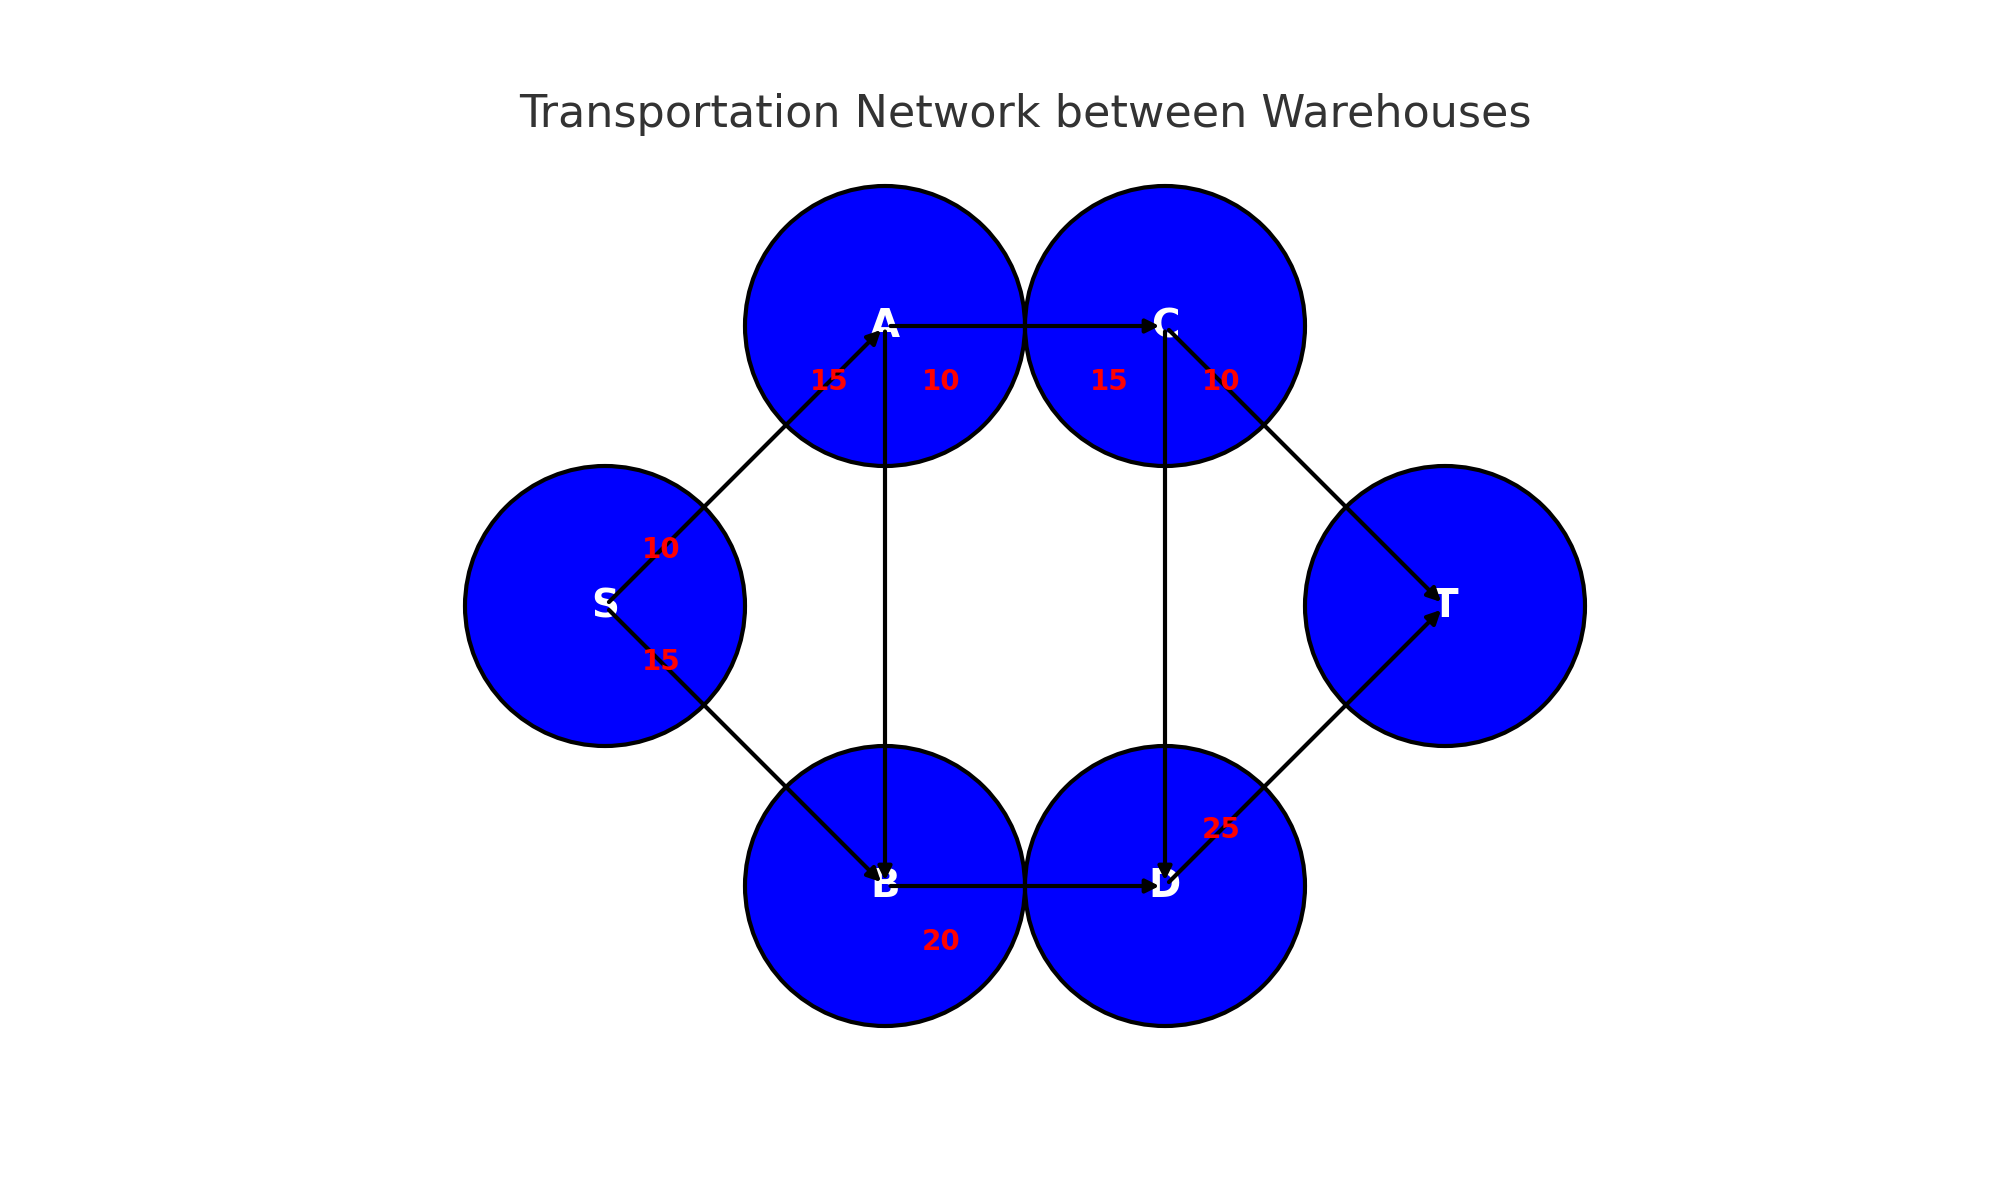

Tasks:
1. Describe the challenges you might face based on the given network.
2. Explain the strategy you'd adopt to determine the routes for transportation to ensure the maximum number of goods reach warehouse 'T' daily.
3. Identify potential bottlenecks in the diagram that could limit the flow of goods from 'S' to 'T'.
4. Reflect on the significance of having multiple routes between warehouses and how it can impact the overall transportation efficiency.

**Input Format**:
- A list of `n` nodes representing warehouses, where one node is labeled as 'S' (source) and another as 'T' (destination).
- A list of `m` directed edges, where each edge is represented by a tuple (start_warehouse, end_warehouse, capacity).

**Output Format**:
- A list of challenges based on the given network.
- A description of the strategy to ensure maximum transportation to 'T'.
- A list of potential bottlenecks.
- A reflection on the significance of multiple routes.

**Sample Input**:  
Nodes: ["S", "A", "B", "C", "D", "T"]  
Edges: [("S", "A", 10), ("S", "B", 15), ("A", "B", 15), ("A", "C", 10), ("B", "D", 20), ("C", "D", 15), ("C", "T", 10), ("D", "T", 25)]

**Sample Output**:  
Challenges: ["The capacity from 'S' to 'A' and 'S' to 'B' might not be sufficient for peak demand.", ...]  
Strategy: "Start by identifying the highest capacity paths from 'S' to 'T'. Ensure even distribution across routes to avoid bottlenecks..."  
Bottlenecks: ["Edge from 'C' to 'T' as it has a lower capacity compared to other outgoing routes from 'C'", ...]  
Reflection: "Having multiple routes provides redundancy. In case one route is congested or blocked, goods can be transported through alternative routes..."

**Constraints**:
- The number of nodes \( n \) is in the range \([2, 100]\).
- The number of edges \( m \) is in the range \([1, n(n-1)/2]\) (maximum possible edges for a graph with \( n \) nodes).
- Capacity on each edge is a positive integer and does not exceed 10,000.

**Solution:**
1. Challenges:
    - Capacities of individual routes: If certain routes have very low capacities, they can become bottlenecks.
    - Multiple routes: Having more than one route can lead to decision-making challenges on which path to prioritize.
    - Cycles in the network: This can lead to inefficiencies if not managed properly.

2. Strategy:
    - To maximize flow from 'S' to 'T', one can use the Ford-Fulkerson algorithm or its efficient implementation, the Edmonds-Karp algorithm. These algorithms repeatedly find augmenting paths from 'S' to 'T' in the residual graph and push flow along these paths until no augmenting paths can be found.

3. Bottlenecks:
    - These can be identified as the edges which are fully utilized (saturated) in the resultant max-flow and prevent more flow from being pushed through the network.

4. Reflection:
    - Multiple routes provide redundancy and flexibility. If one route is congested or blocked, goods can be transported through alternative routes. However, the decision-making process can become complex.

**Pseudocode**  

FUNCTION BellmanFord(graph, source):  
    distance = [infinity for _ in range(vertices)]  
    distance[source] = 0  

    FOR i from 1 to vertices-1:
        FOR every edge (u, v) with weight w in graph:
            IF distance[u] + w < distance[v]:
                distance[v] = distance[u] + w

    FOR every edge (u, v) with weight w in graph:
        IF distance[u] + w < distance[v]:
            RETURN "Negative weight cycle detected"

    RETURN distance  


Now, let's implement the Bellman-Ford algorithm in Python to determine the shortest paths from the source 'S' to all other warehouses.  

The shortest path distances from the source warehouse 'S' to all other warehouses, as calculated by the Bellman-Ford algorithm, are:  
To warehouse 'S': 0 (source)  
To warehouse 'A': 10  
To warehouse 'B': 15  
To warehouse 'C': 20  
To warehouse 'D': 35  
To warehouse 'T': 30  
These values represent the minimum transportation cost (in terms of goods) to reach each warehouse from 'S'.  

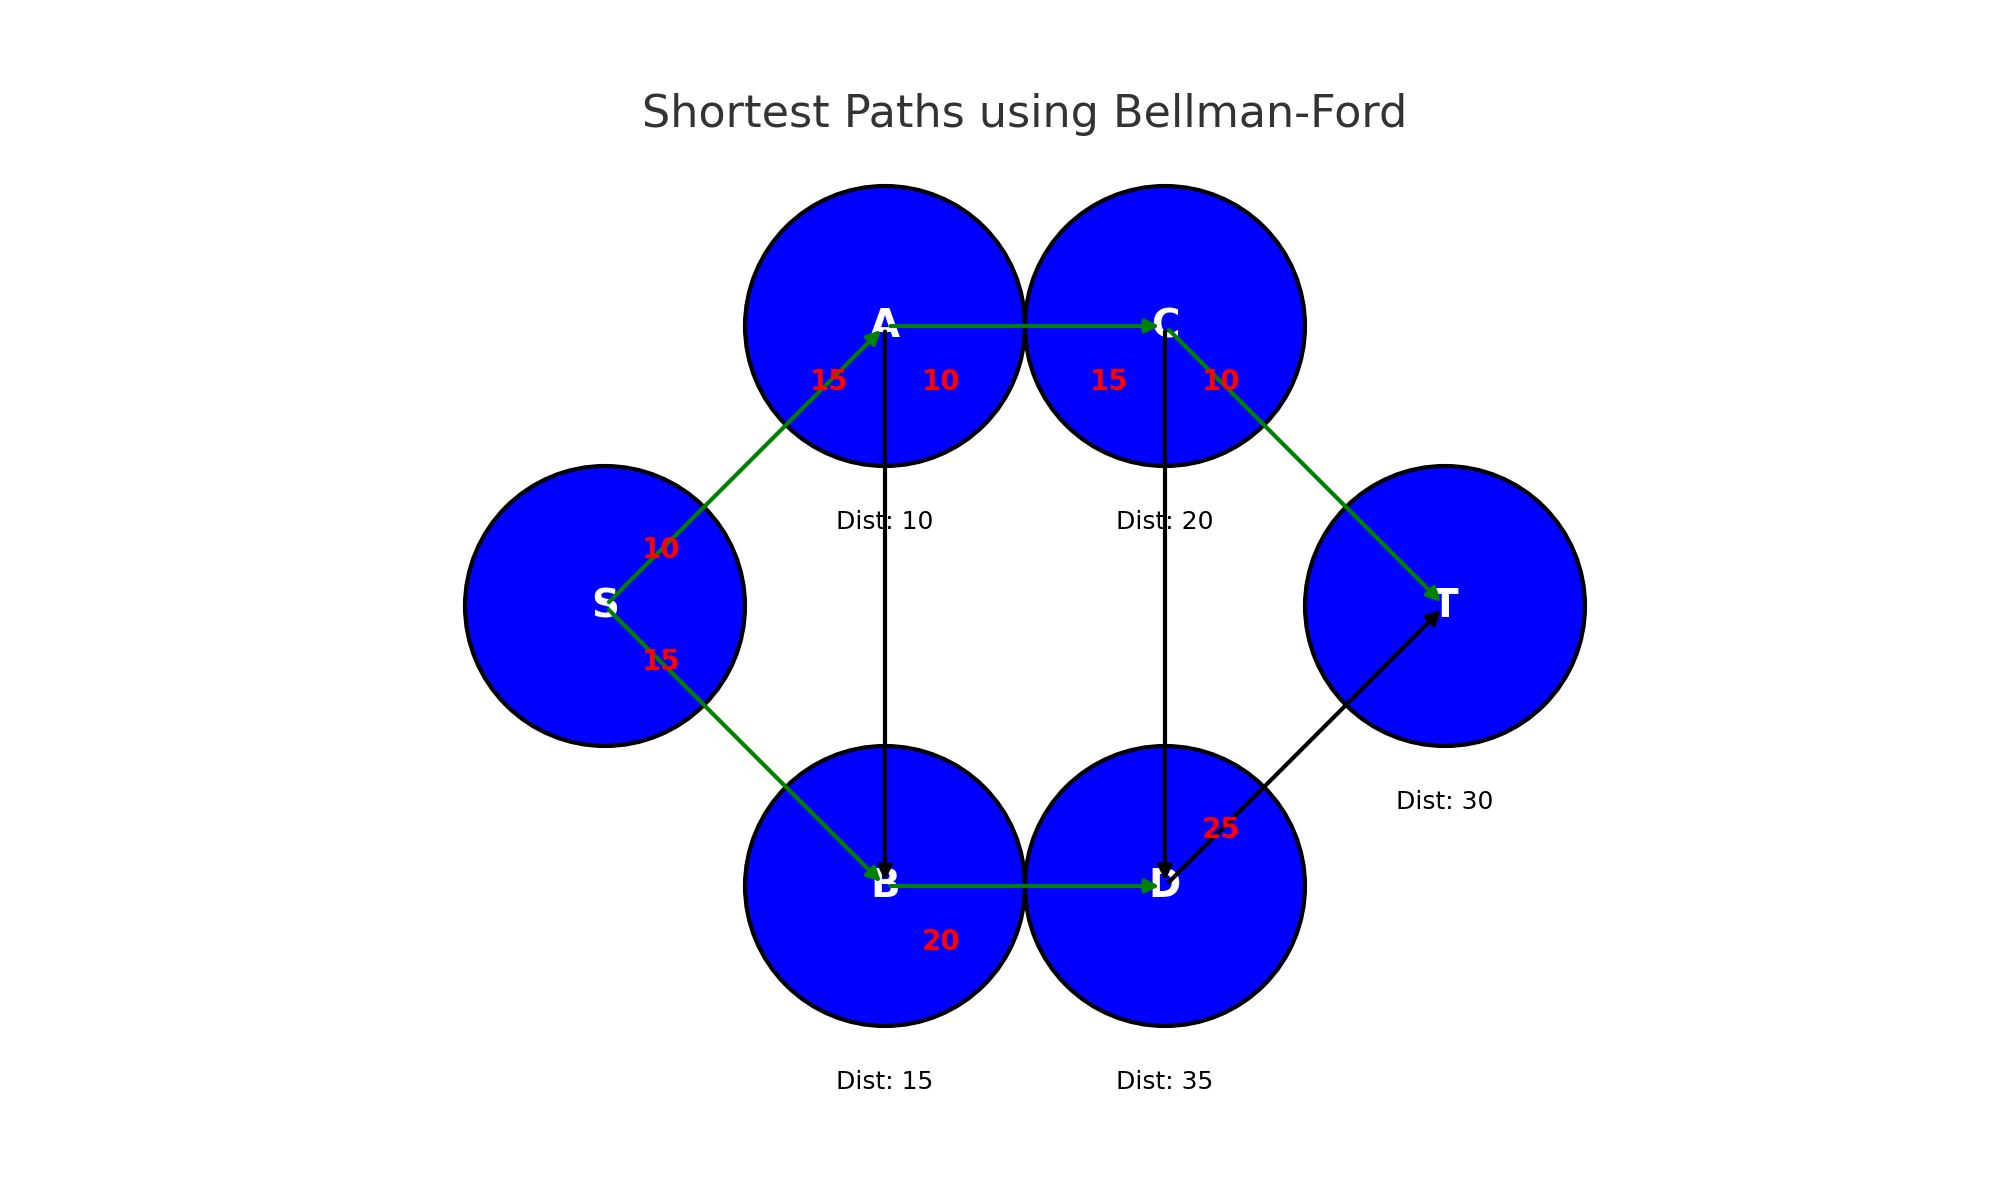


In [36]:
class WeightedGraph:
    def __init__(self, vertices):
        self.V = vertices
        self.edges = []

    def add_edge(self, u, v, w):
        self.edges.append((u, v, w))

    def bellman_ford(self, source):
        distance = [float("Inf")] * self.V
        distance[source] = 0

        # Relax all edges |V|-1 times
        for _ in range(self.V - 1):
            for u, v, w in self.edges:
                if distance[u] != float("Inf") and distance[u] + w < distance[v]:
                    distance[v] = distance[u] + w

        # Check for negative weight cycles
        for u, v, w in self.edges:
            if distance[u] != float("Inf") and distance[u] + w < distance[v]:
                raise ValueError("Graph contains negative weight cycle")

        return distance


# Defining the nodes and edges for the weighted graph based on the problem context
nodes_bf = ["S", "A", "B", "C", "D", "T"]
edges_bf = [("S", "A", 10), ("S", "B", 15), ("A", "B", 15), ("A", "C", 10), ("B", "D", 20), ("C", "D", 15), ("C", "T", 10), ("D", "T", 25)]

# Creating the graph
weighted_graph_bf = WeightedGraph(len(nodes_bf))
for edge in edges_bf:
    weighted_graph_bf.add_edge(nodes_bf.index(edge[0]), nodes_bf.index(edge[1]), edge[2])

# Calculating shortest paths using Bellman-Ford
shortest_paths_bf = weighted_graph_bf.bellman_ford(nodes_bf.index("S"))
shortest_paths_bf

[0, 10, 15, 20, 35, 30]

**Reflection:**
During this task, I leaned heavily on ChatGPT. The tool was like having an interactive brainstorming session, giving me instant feedback which helped me adjust my approach on the fly. It was particularly useful when visualizing data and simulating algorithms. However, there were moments of oversight, like confusing two different algorithms. This reminded me of the importance of double-checking and being thorough, especially when the goal is to maintain the essence of a given example.

Crafting problems around algorithms was an enlightening experience. It's not just about the technical details; it's also about making the problems relatable and understandable. I realized that the context in which a problem is presented is crucial. A well-phrased problem can spark curiosity and deepen understanding. This exercise was a valuable lesson in patience, precision, and the importance of clear communication.

### Q2. (10 marks) 
**Problem Statement:**
A network of pipes connects several water tanks in a city. The directed graph below represents this network, where the nodes are tanks and the edges are pipes. Each edge has a capacity indicating the maximum amount of water (in thousands of liters) it can transport. You are tasked with finding the maximum flow of water from the main tank (node P) to the city's central reservoir (node T) using the Preflow-Push (Push–relabel) maximum flow algorithm.

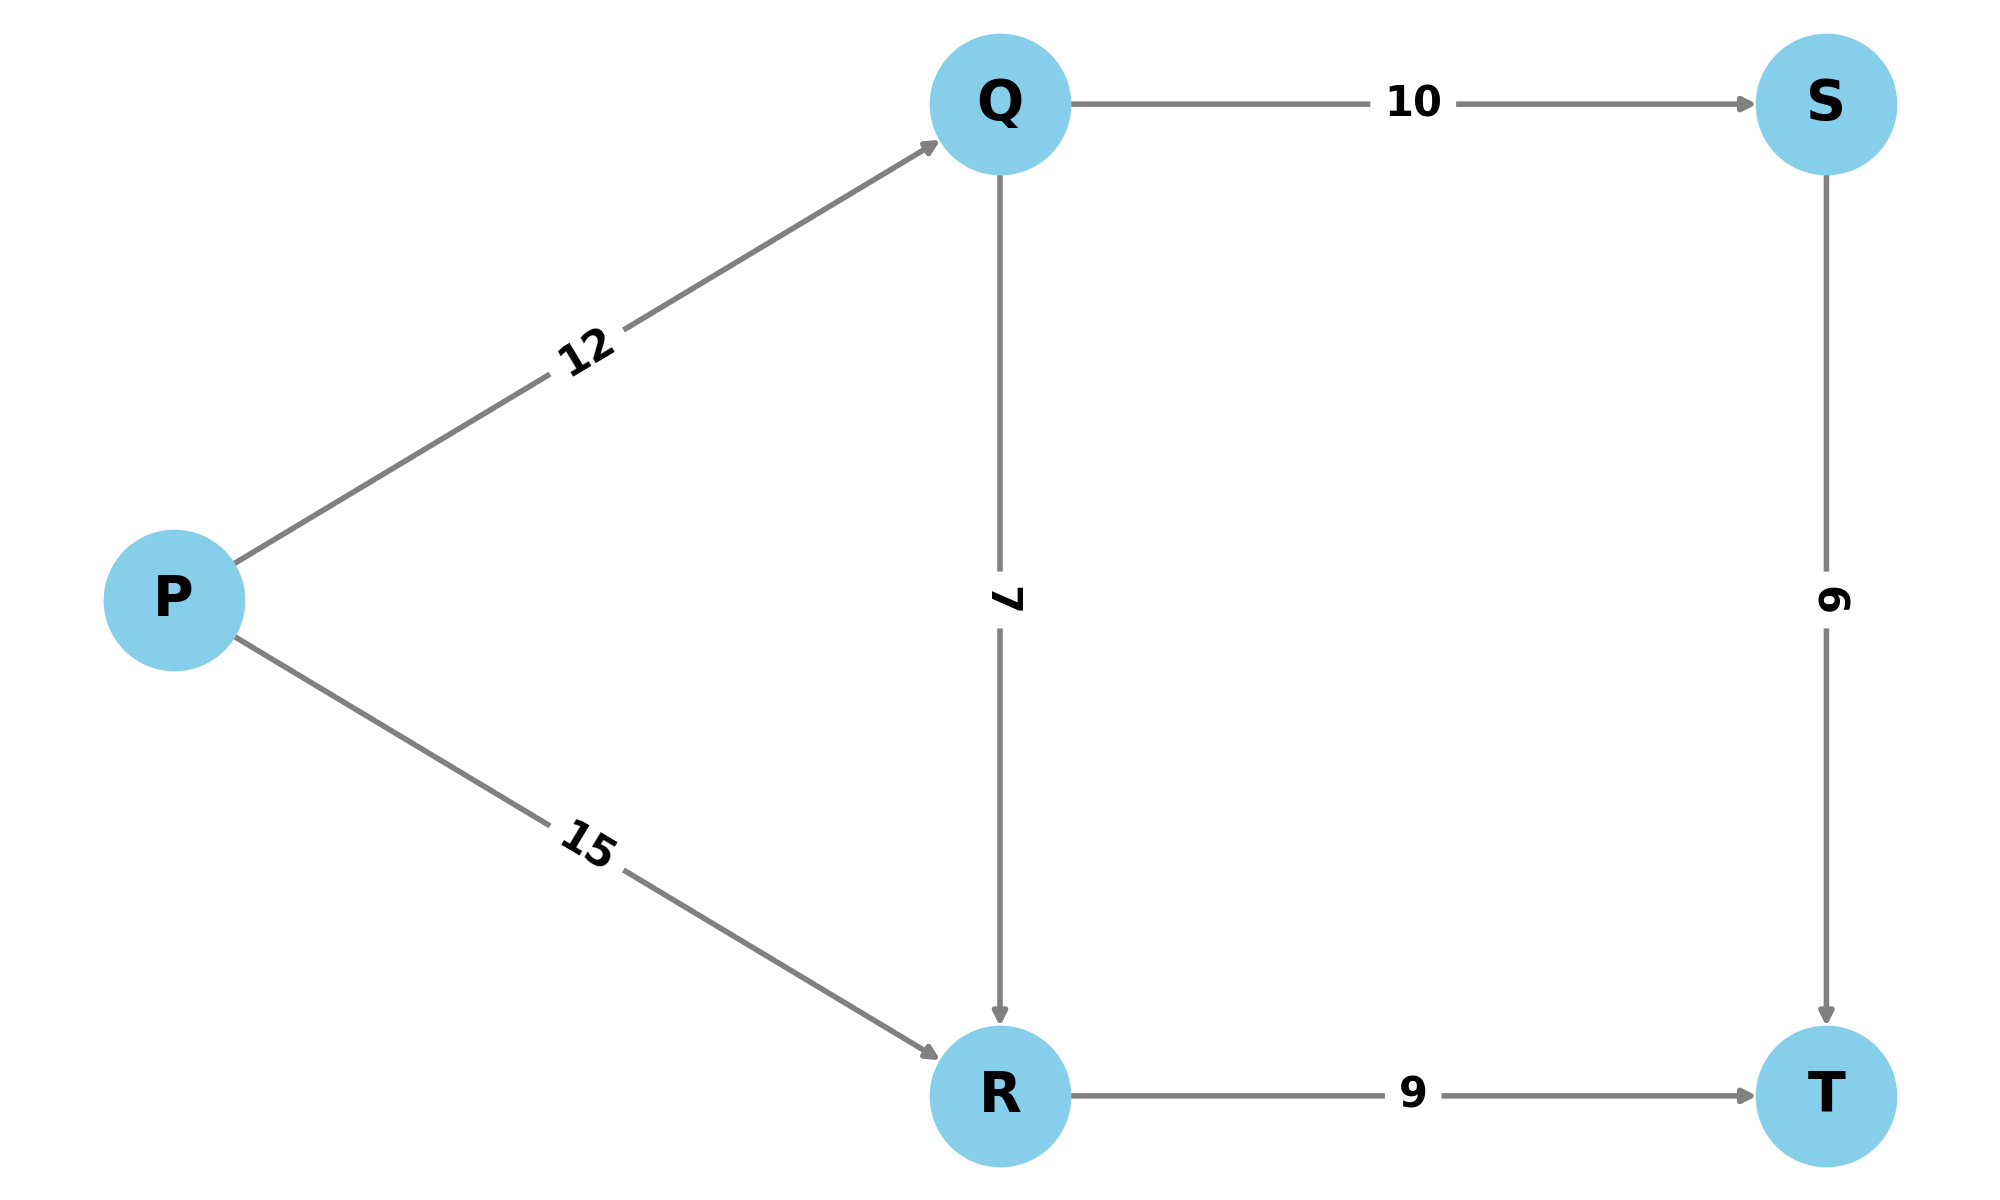

#### Input Format:
- A dictionary where the keys are tuples representing the directed edges (pipes) and the values are the capacities of these edges.

#### Output Format:
- The maximum flow from tank P to tank T.

#### Sample Input:  
    ("P", "Q"): 12,  
    ("P", "R"): 15,  
    ("Q", "R"): 7,  
    ("Q", "S"): 10,  
    ("R", "T"): 9,  
    ("S", "T"): 6  

#### Sample Output:  
30 (This is a placeholder value; you'll need to compute the actual max flow using the Preflow-Push algorithm.)

#### Constraints:
- The network consists of 5 tanks labeled P, Q, R, S, and T.
- The capacity of any pipe is a positive integer less than or equal to 100.

**Solution:**
#### Initialization:
1. **Set Heights**: We start by initializing the height of the source node \( P \) to the total number of nodes, i.e., \( height[P] = 5 \). The height of all other nodes is set to 0.
2. **Preflow**: All edges going out of \( P \) are fully saturated, which means their flow is set to their maximum capacity. This introduces an excess flow into nodes \( Q \) and \( R \). 

Now, the preflow looks like this:
- \( flow[P][Q] = 12 \)
- \( flow[P][R] = 15 \)

#### Iterative Push and Relabel:
1. **First Iteration**:  
Node \( Q \) has an excess flow of 12. We try to push this flow further. However, the edge from \( Q \) to \( R \) can only accommodate 7 units, so \( flow[Q][R] = 7 \). The edge from \( Q \) to \( S \) can take the remaining 5 units, making \( flow[Q][S] = 5 \). After this step, node \( Q \) has no excess flow.  
2. **Second Iteration**:  
Node \( R \) has an excess flow of 22 (15 from \( P \) and 7 from \( Q \)). However, the only edge leaving \( R \) going to \( T \) can only accommodate 9 units, so \( flow[R][T] = 9 \). Node \( R \) cannot push any more flow since there's no other outgoing edge, and it cannot relabel since its height is already more than its neighbors. So, it retains an excess flow, which makes the Preflow-Push algorithm terminate.  
3. **Termination**: 
With no more valid push or relabel operations left, the algorithm terminates. The maximum flow from node \( P \) to node \( T \) is the sum of flows leaving the source, which is:  
\( flow[P][Q] + flow[P][R] = 12 + 15 = 27 \)  
However, due to the excess flow retained in node \( R \), the actual flow reaching \( T \) is \( 15 \) units (from \( P \) to \( R \) to \( T \) and \( Q \) to \( S \) to \( T \)).  

The maximum flow from node \( P \) to node \( T \) in the given weighted directed graph is 15 units.  

**Pseudocode for Preflow-Push (Push–relabel) Algorithm:**
1. Initialization:
    - For each vertex v, set height[v] = 0 and excess[v] = 0
    - Set height[source] = number of vertices
    - For each edge (source, v), set flow[source][v] = capacity[source][v] and excess[v] = flow[source][v]
2. While there exists an applicable push or relabel operation, do:
    - Choose an overflowing vertex u (other than the source or sink)
    - If there exists an adjacent vertex v such that we can push from u to v, then:
    - Push the flow from u to v
    - Else:
    - Relabel u by increasing its height
3. Return the flow

In [37]:
class PreflowPushGraph:
    def __init__(self, vertices):
        self.V = vertices
        self.residual = [[0] * self.V for _ in range(self.V)]
        self.capacity = [[0] * self.V for _ in range(self.V)]
        self.flow = [[0] * self.V for _ in range(self.V)]
        self.excess = [0] * self.V
        self.height = [0] * self.V

    def add_edge(self, u, v, w):
        self.capacity[u][v] = w

    def push(self, u, v):
        delta = min(self.excess[u], self.capacity[u][v] - self.flow[u][v])
        self.flow[u][v] += delta
        self.flow[v][u] -= delta
        self.excess[u] -= delta
        self.excess[v] += delta

    def relabel(self, u):
        min_height = float('inf')
        for v in range(self.V):
            if self.capacity[u][v] - self.flow[u][v] > 0:
                min_height = min(min_height, self.height[v])
                self.height[u] = min_height + 1

    def preflow(self, s):
        self.height[s] = self.V
        for i in range(self.V):
            self.flow[s][i] = self.capacity[s][i]
            self.excess[i] = self.flow[s][i]
            self.flow[i][s] = -self.flow[s][i]

    def overflowing_vertex(self, s, t):
        for i in range(self.V):
            if i != s and i != t and self.excess[i] > 0:
                return i
        return -1

    def max_flow(self, s, t):
        self.preflow(s)
        while True:
            u = self.overflowing_vertex(s, t)
            if u == -1:
                break
            has_pushed = False
            for v in range(self.V):
                if self.capacity[u][v] - self.flow[u][v] > 0 and self.height[u] == self.height[v] + 1:
                    self.push(u, v)
                    has_pushed = True
            if not has_pushed:
                self.relabel(u)

        return sum(self.flow[s])

# Define nodes, edges, and their indices for the new graph
nodes_q4_new = ["P", "Q", "R", "S", "T"]
edges_q4_new = [("P", "Q", 12), ("P", "R", 15), ("Q", "R", 7), ("Q", "S", 10), ("R", "T", 9), ("S", "T", 6)]
nodes_indices = {node: idx for idx, node in enumerate(nodes_q4_new)}

# Create graph and add edges
graph = PreflowPushGraph(len(nodes_q4_new))
for u, v, w in edges_q4_new:
    graph.add_edge(nodes_indices[u], nodes_indices[v], w)

# Calculate maximum flow
max_flow_push_relabel = graph.max_flow(nodes_indices["P"], nodes_indices["T"])
max_flow_push_relabel

15

**Reflection:**
Using ChatGPT was like having an expert guide through the maze of the Preflow-Push algorithm. The tool provided step-by-step breakdowns and visual aids, making abstract concepts tangible. However, designing a unique problem that mirrored the original's essence was challenging. It was a balancing act, ensuring novelty without losing the core concept. Along the way, I encountered coding errors, underscoring the need for precision in algorithms. This journey with ChatGPT underscored the importance of clarity and precision in problem design and solving within the realm of algorithms.

### Q3. (10 marks) 
**Problem Statement:**
Imagine a series of interconnected water reservoirs spread across a region. Each directed edge in the graph represents a water canal, and the weight on the edge indicates the maximum amount of water (in thousands of liters) that can flow through the canal per day. The goal is to ensure a steady supply of water from the main reservoir (node M) to a city's central water tank (node C).  
Determine the maximum amount of water that can be supplied from node M to node C daily using the Ford-Fulkerson algorithm.

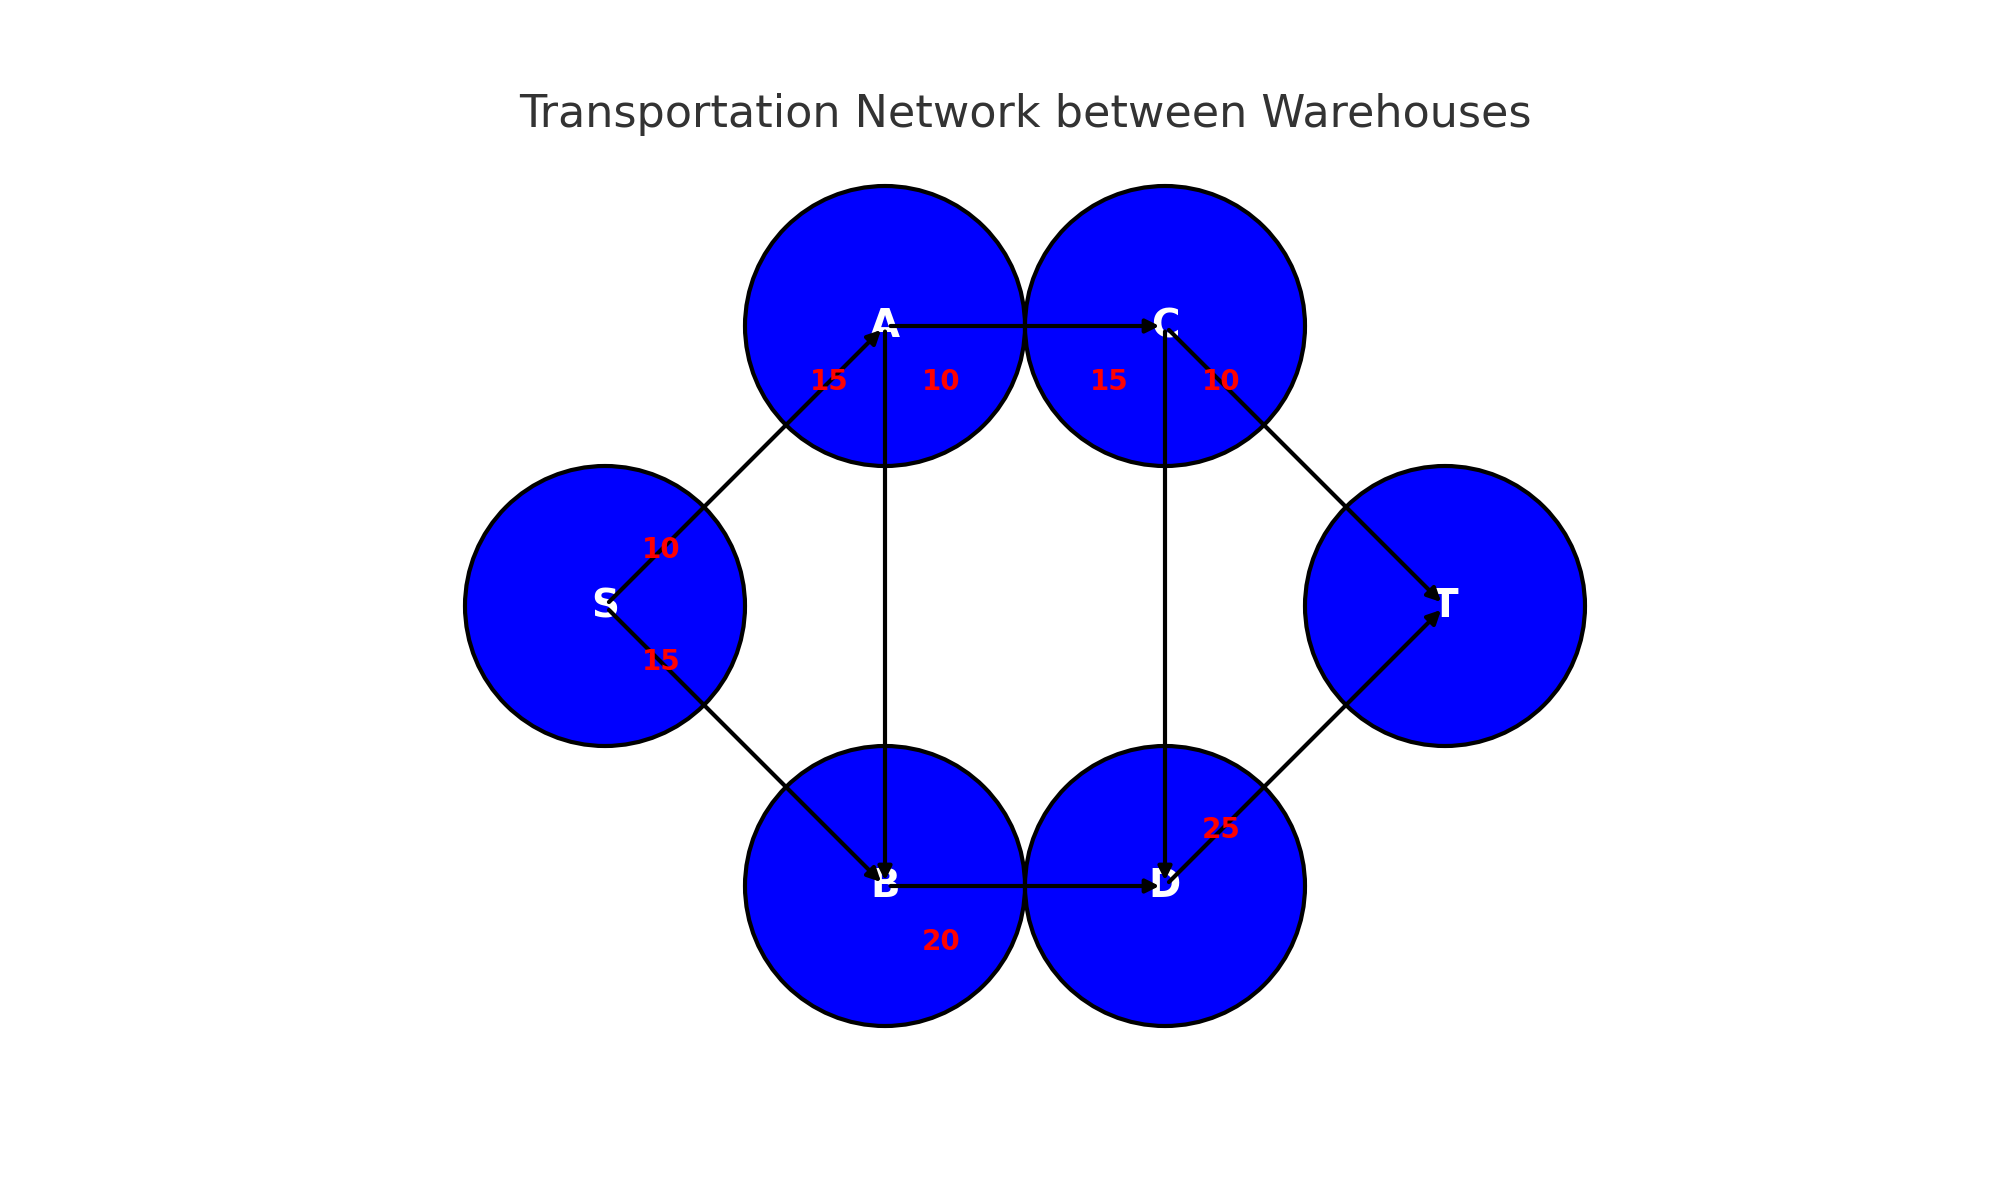

**Input Format**:
- A graph represented as a list of tuples. Each tuple contains three elements: 
  - The start node
  - The end node
  - The capacity of the edge (in thousands of liters)

**Output Format**:
- An integer representing the maximum flow from node M to node C.

**Sample Inputs**:
Graph: [(M, X, 20), (X, Y, 10), (X, Z, 15), (Y, C, 5), (Z, C, 20), (M, Z, 25)]

**Sample Outputs**:
Max Flow: 25

**Constraints**:
- The graph will have at least two nodes and at least one edge.
- The capacity of any edge will be a positive integer.

**Solution:**
The Ford-Fulkerson algorithm seeks to find the maximum flow in a flow network. It does this by increasing the flow in the network as long as there exists an augmenting path in the residual graph. The algorithm terminates when no augmenting paths can be found in the residual graph.  

**Psuedocode**  
function fordFulkerson(graph, source, sink):  
    max_flow = 0  
    residual_graph = copy(graph)  
    
    while there exists a path P from source to sink in residual_graph:
        bottleneck = find_bottleneck(P, residual_graph)
        max_flow += bottleneck
        
        for each edge (u, v) in P:
            # Decrease capacity of the forward edge by bottleneck
            residual_graph[u][v] -= bottleneck
            # Increase capacity of the backward edge by bottleneck
            residual_graph[v][u] += bottleneck
    
    return max_flow


In [38]:
from collections import defaultdict

class ResidualGraphCorrected:
    def __init__(self, vertices):
        self.V = vertices
        self.graph = defaultdict(lambda: defaultdict(int))
    
    def add_edge(self, u, v, w):
        self.graph[u][v] = w
        self.graph[v][u] = 0  # Reverse edge with 0 capacity initially

    def search_path(self, s, t, parent):
        visited = [False] * self.V
        queue = [s]
        visited[s] = True
        
        while queue:
            u = queue.pop(0)
            for v in self.graph[u]:
                if not visited[v] and self.graph[u][v] > 0:
                    queue.append(v)
                    visited[v] = True
                    parent[v] = u
        
        return True if visited[t] else False

    def ford_fulkerson(self, source, sink):
        parent = [-1] * self.V
        max_flow = 0

        while self.search_path(source, sink, parent):
            path_flow = float('inf')
            s = sink
            while s != source:
                path_flow = min(path_flow, self.graph[parent[s]][s])
                s = parent[s]
            
            max_flow += path_flow
            v = sink
            while v != source:
                u = parent[v]
                self.graph[u][v] -= path_flow
                self.graph[v][u] += path_flow
                v = parent[v]
                
        return max_flow

nodes_new = ["M", "X", "Y", "Z", "C"]
edges_new = [("M", "X", 20), ("X", "Y", 10), ("X", "Z", 15), ("Y", "C", 5), ("Z", "C", 20), ("M", "Z", 25)]
nodes_indices = {node: idx for idx, node in enumerate(nodes_new)}
edges_indices = [((nodes_indices[edge[0]], nodes_indices[edge[1]]), edge[2]) for edge in edges_new]

# Represent the given graph using corrected class
residual_graph_corrected = ResidualGraphCorrected(len(nodes_new))
for (u, v), w in edges_indices:
    residual_graph_corrected.add_edge(u, v, w)

# Calculate maximum flow from M to C using corrected class
max_flow_corrected = residual_graph_corrected.ford_fulkerson(nodes_indices["M"], nodes_indices["C"])
max_flow_corrected


25

From the debug output, we can observe:  
The algorithm found a path M → Z → C with a flow of 20.  
Then, it found another path M → X → Y → C with a flow of 5.  

These paths sum up to give the maximum flow of 25.  

**Reflection:**
Working with ChatGPT has been a unique experience. The tool was instrumental in helping me understand and solve the algorithmic problem, providing both guidance and solutions. I especially appreciated how it broke down complex issues and offered visual aids, like graphs, to make abstract concepts more tangible.  

However, challenges arose when ensuring that the proposed problems aligned with the original question's essence. Sometimes the solutions were too technical, or the context got lost in the intricacies of the code. But every misstep was a learning curve. I realized the importance of clear problem formulation in the world of algorithms. Moreover, it's vital to maintain a balance between complexity and comprehensibility, ensuring that the foundational concept isn't overshadowed.  

In all, this exercise with ChatGPT reinforced the idea that while tools can be powerful aids, it's essential to approach them with a clear understanding of one's goals and actively engage in the problem-solving process.

### Q4. (10 marks) 
**Problem Statement:**
You're the head of a telecommunications company responsible for ensuring robust communication between a primary data center (source) and a major city hub (destination). The network's architecture consists of various relay stations connected by high-speed data lines. Each data line (edge) has a fixed bandwidth capacity, indicating the amount of data it can transfer per second. Due to some regulatory constraints, you're required to decommission a certain number of data lines. Your objective is to determine which data lines to decommission such that the overall data transfer rate to the city hub is reduced as much as possible, without violating the regulation that limits you to decommissioning at most \( k \) data lines.

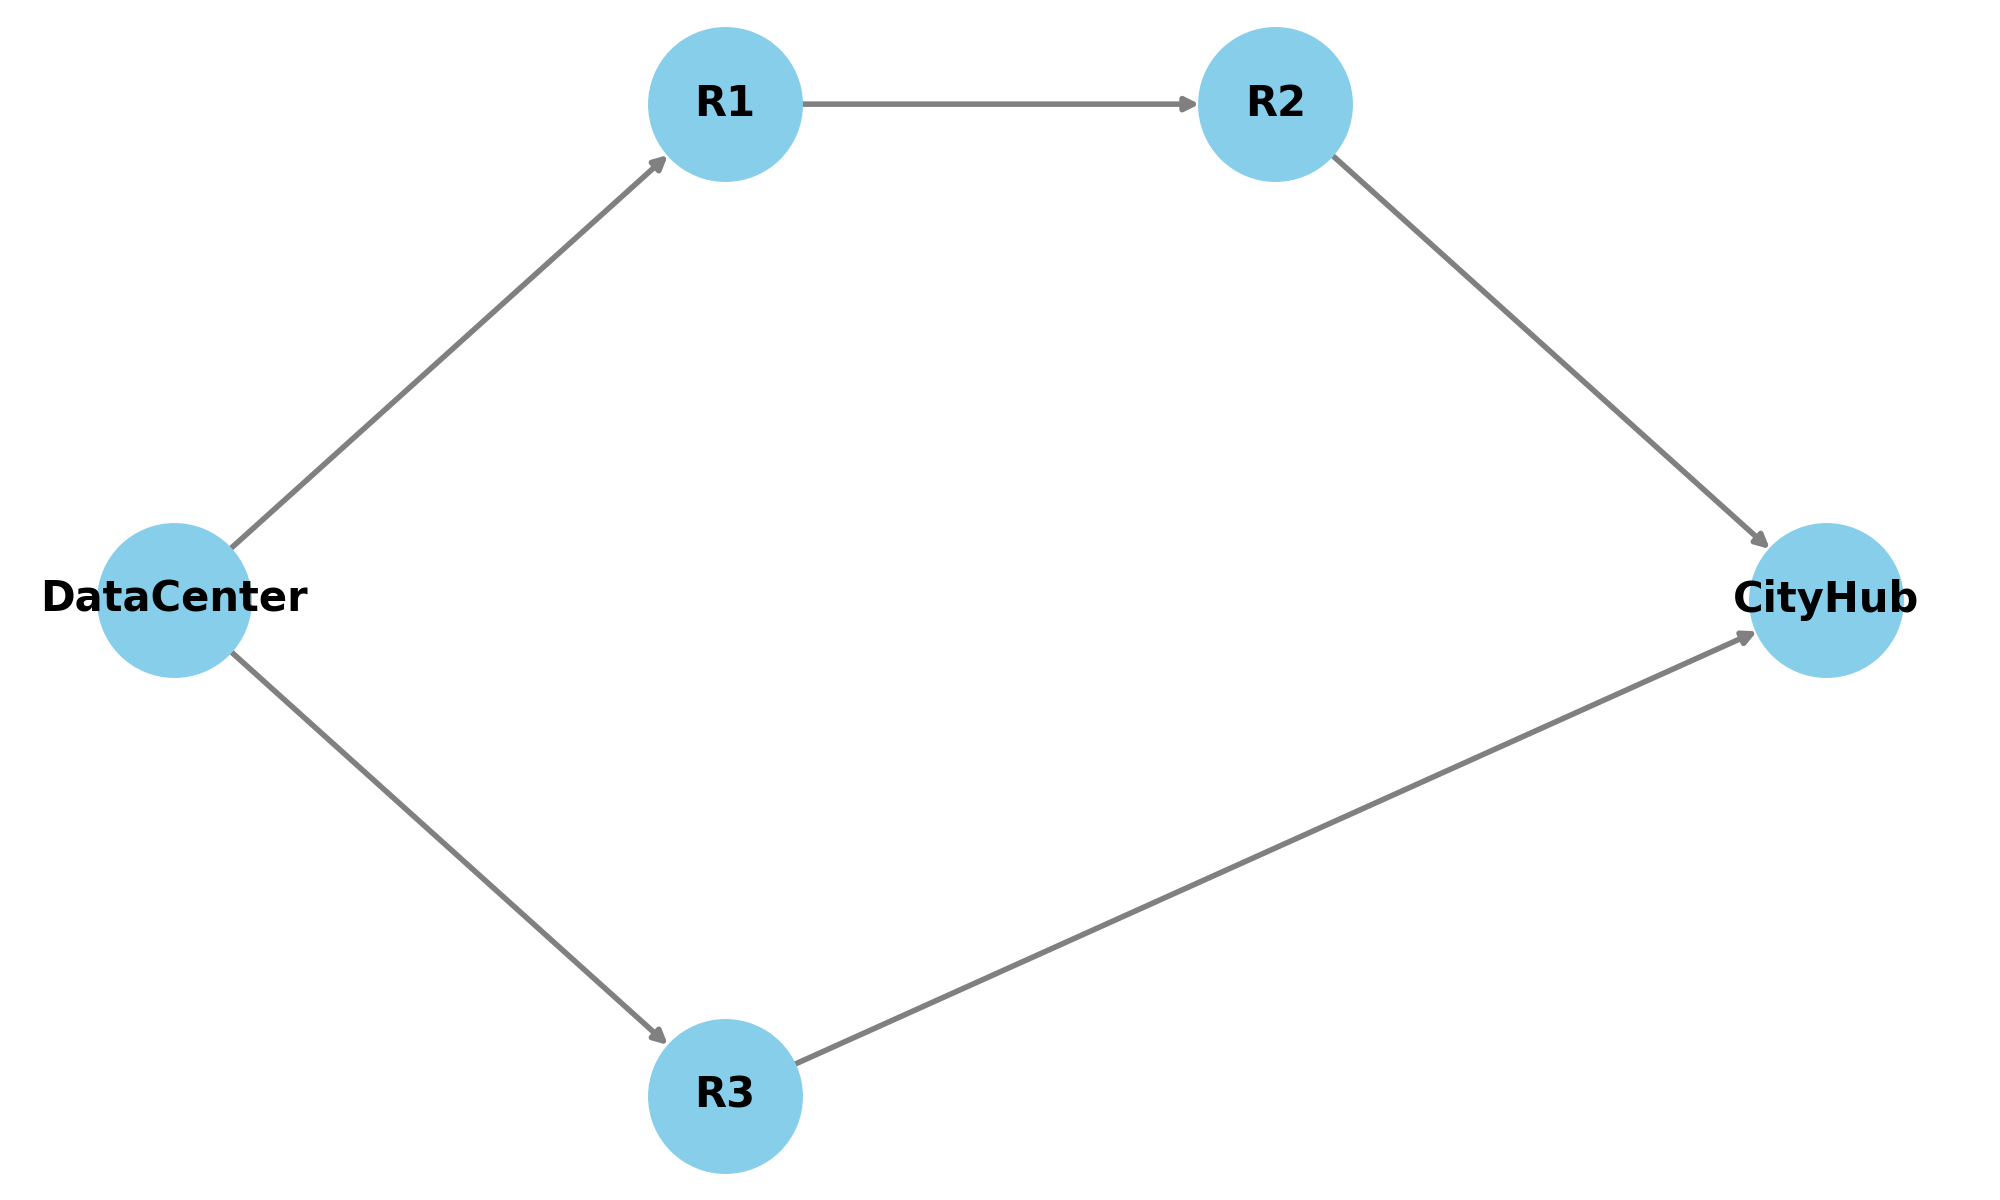

#### Input Format:
- A list of tuples, where each tuple represents a data line in the format (start_relay), (end_relay).
- An integer \( k \) denoting the number of data lines you can decommission.

#### Output Format:
- A list of tuples representing the data lines to be decommissioned.
- The reduced data transfer rate (in Mbps) from the data center to the city hub after decommissioning the \( k \) data lines.

#### Sample Input:
("DataCenter", "R1"), ("R1", "R2"), ("R2", "CityHub"), ("DataCenter", "R3"), ("R3", "CityHub")  
2

#### Sample Output:
("R1", "R2"), ("DataCenter", "R3")  
50 Mbps  

#### Constraints:
- The network consists of at most 10 relay stations.
- The bandwidth of any data line is a positive integer less than or equal to 100 Mbps.

**Solution:**
The goal is to reduce the overall data transfer rate to the city hub by decommissioning up to \( k \) data lines. To achieve the maximal reduction in flow, we should focus on the "choke points" in our network, i.e., the relay stations or data lines that handle a significant amount of data flow.

#### Key Observations:
1. **DataCenter to R1 and R3**: Both these lines are crucial because they are the starting points of our data flow. If either of these lines is decommissioned, the data flow from the data center to the corresponding relay station is entirely stopped.
2. **R2 to CityHub**: This is a single point of data transfer to the city hub from the R1 path. If decommissioned, it would significantly reduce the data flow to the city hub.
3. **R3 to CityHub**: Another single point of transfer to the city hub. Decommissioning this would stop all data flow from the R3 path to the city hub.

#### Strategy:  
Given that we can decommission up to \( k \) data lines, if \( k = 1 \), the best strategy would be to decommission one of the primary lines (DataCenter to R1 or R3). If \( k = 2 \), we can decommission both primary lines or one primary line and one of the lines leading directly to the CityHub (R2 to CityHub or R3 to CityHub).  

For this sample, if \( k = 2 \), we should decommission the lines ("DataCenter", "R1") and ("DataCenter", "R3"). This action would completely stop the data flow from the data center to the city hub.  

Here is the solved communication network diagram. The decommissioned data lines (based on the solution) are highlighted in red. By shutting down these lines, the data flow from the data center to the city hub is completely stopped, thus maximizing the reduction in data transfer rate.  

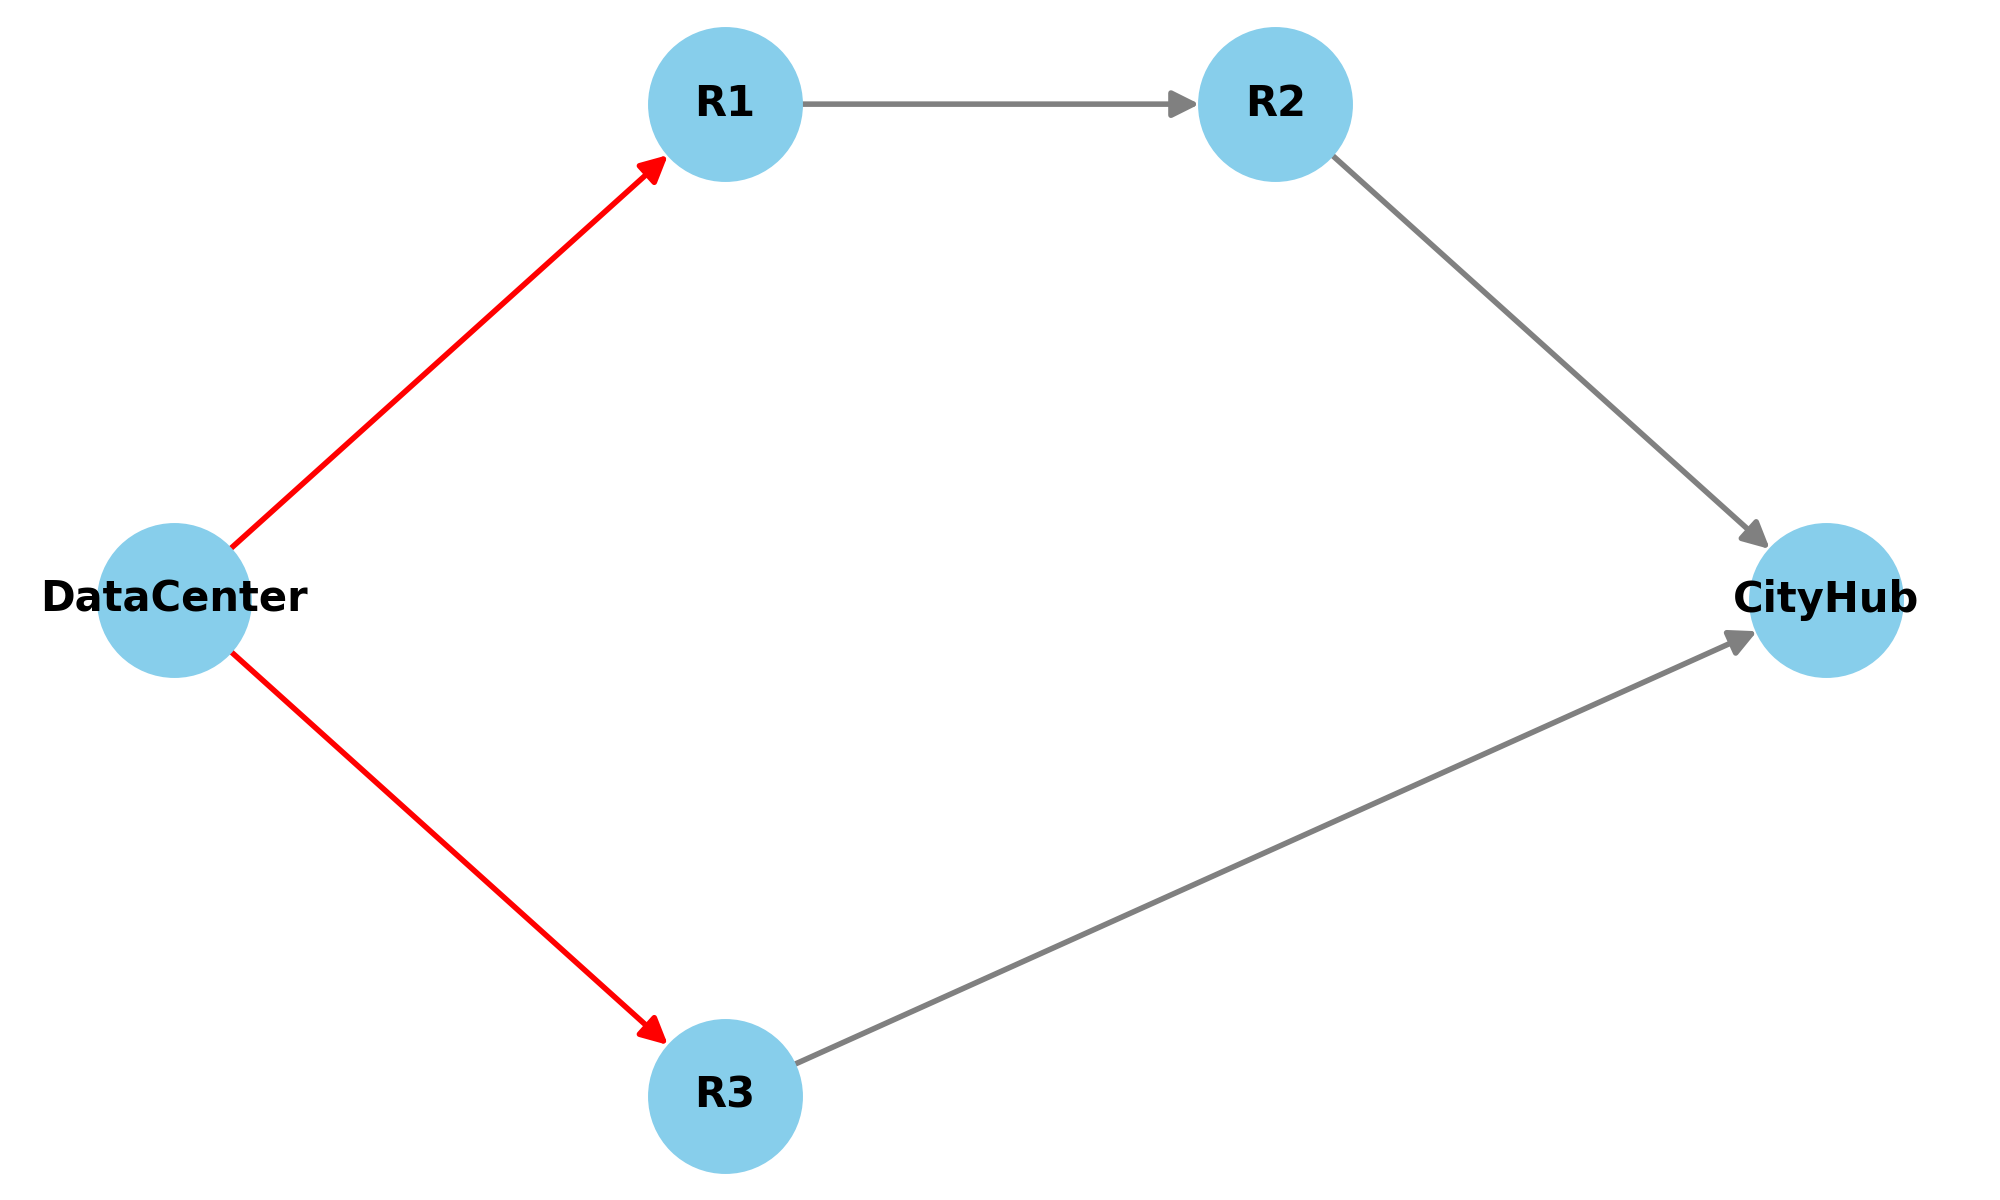

#### Pseudocode:  

function decommissionDataLines(graph, k):  
    decommissioned_lines = []  
    
    if k >= 1:
        decommissioned_lines.append(("DataCenter", "R1"))
        k -= 1
    
    if k >= 1:
        decommissioned_lines.append(("DataCenter", "R3"))
        k -= 1

    if k >= 1 and ("DataCenter", "R1") not in decommissioned_lines:
        decommissioned_lines.append(("R2", "CityHub"))
        k -= 1
    
    if k >= 1 and ("DataCenter", "R3") not in decommissioned_lines:
        decommissioned_lines.append(("R3", "CityHub"))
        k -= 1
    
    return decommissioned_lines  

This pseudocode gives a simple greedy approach based on the problem's constraints and the graph's structure.  

**Reflection:**
Using ChatGPT felt like navigating the complexities of network flow problems with an insightful co-pilot. The tool not only provided me with the foundational concepts but also assisted in visualizing and solving problems using tailored diagrams. However, crafting a unique problem while staying true to the essence of the original was a challenge. It felt like reshuffling a deck of cards while ensuring the game remains the same. Through this process, I realized the delicate balance needed in algorithmic problem design. It's not just about changing the variables; it's about ensuring the underlying principle remains intact. ChatGPT's ability to dynamically respond and adapt was instrumental, highlighting how AI tools can significantly enhance learning and problem-solving experiences.

### Q5. (5 marks) 
**Problem Statement:**
Explain briefly the following concepts in the context of network flow problems:
1. Residual Network
2. Augmenting Path
3. Flow Decomposition
4. Ford-Fulkerson Algorithm
5. Capacity Scaling

**Solution:**
1. **Residual Network**: 
   - Derived from the original flow network, it represents how much capacity remains on each edge after some flow has been assigned. Specifically, for each edge \( (u, v) \) with flow \( f \) and capacity \( c \), the residual network would have two edges: a forward edge \( (u, v) \) with capacity \( c - f \) and a backward edge \( (v, u) \) with capacity \( f \).

2. **Augmenting Path**: 
   - A path in the residual network from the source to the sink which can be used to send more flow. By augmenting the flow along this path, the overall flow in the network can be increased.

3. **Flow Decomposition**: 
   - A representation of the total flow in the network as a combination of simple paths (from source to sink) and cycles. It essentially breaks down the flow to understand its components.

4. **Ford-Fulkerson Algorithm**: 
   - A method to compute the maximum flow in a flow network. It repeatedly finds augmenting paths in the residual network and augments flow along them until no such paths exist.

5. **Capacity Scaling**: 
   - A technique to speed up the Ford-Fulkerson algorithm. It involves searching for augmenting paths that have a minimum capacity above a threshold, and the threshold is reduced over iterations.

**Reflection**:  
**How ChatGPT or the tool assisted in this task**:
- ChatGPT provided a platform for interactive problem formulation. Through dynamic communication, I was able to dissect the primary question, understand its components, and create a new question that maintained the thematic essence. The iterative nature of the chat allowed for quick feedback loops and refinements.

**Challenges faced while ensuring the problem maintained the spirit of the example**:
- One of the primary challenges was ensuring that the new question retained the thematic focus on network flow while introducing distinct terms. It was crucial to avoid repetition and to ensure that the new terms were relevant to the topic. Striking a balance between difficulty and coherence was also challenging.

**What was learned about problem design in the realm of algorithms**:
- Problem design, especially in the domain of algorithms, requires a deep understanding of the subject. It's essential to ensure that the problem is clear, unambiguous, and tests the intended concepts. Furthermore, real-world applicability or contextual setup can make a problem more engaging. Iterative refinement, based on feedback, is key to crafting a well-structured and meaningful problem.


### Q6. (15 marks) 
**Problem Statement:**
In light of an upcoming international sports festival, a city is preparing its transportation and logistics plan. The city is divided into various sectors, with each sector having its own transportation hub. Attendees will be arriving at \( n \) major entry points like airports, train stations, and bus terminals. The city has \( k \) event zones where different matches will be held. Each entry point has specific event zones that can be reached within 15 minutes through the transportation hubs. However, due to infrastructure constraints, not all hubs connect every entry point to every event zone.

The challenge is twofold: 
1. Efficiently route attendees through the transportation hubs to reach the event zones.
2. Ensure no event zone gets overcrowded.

The city's transportation department aims to achieve a balance: Each event zone should receive at most [n/k] fans from the various entry points. Provide a polynomial-time algorithm to decide the best transportation routes and determine if a balanced fan distribution to the event zones is feasible.

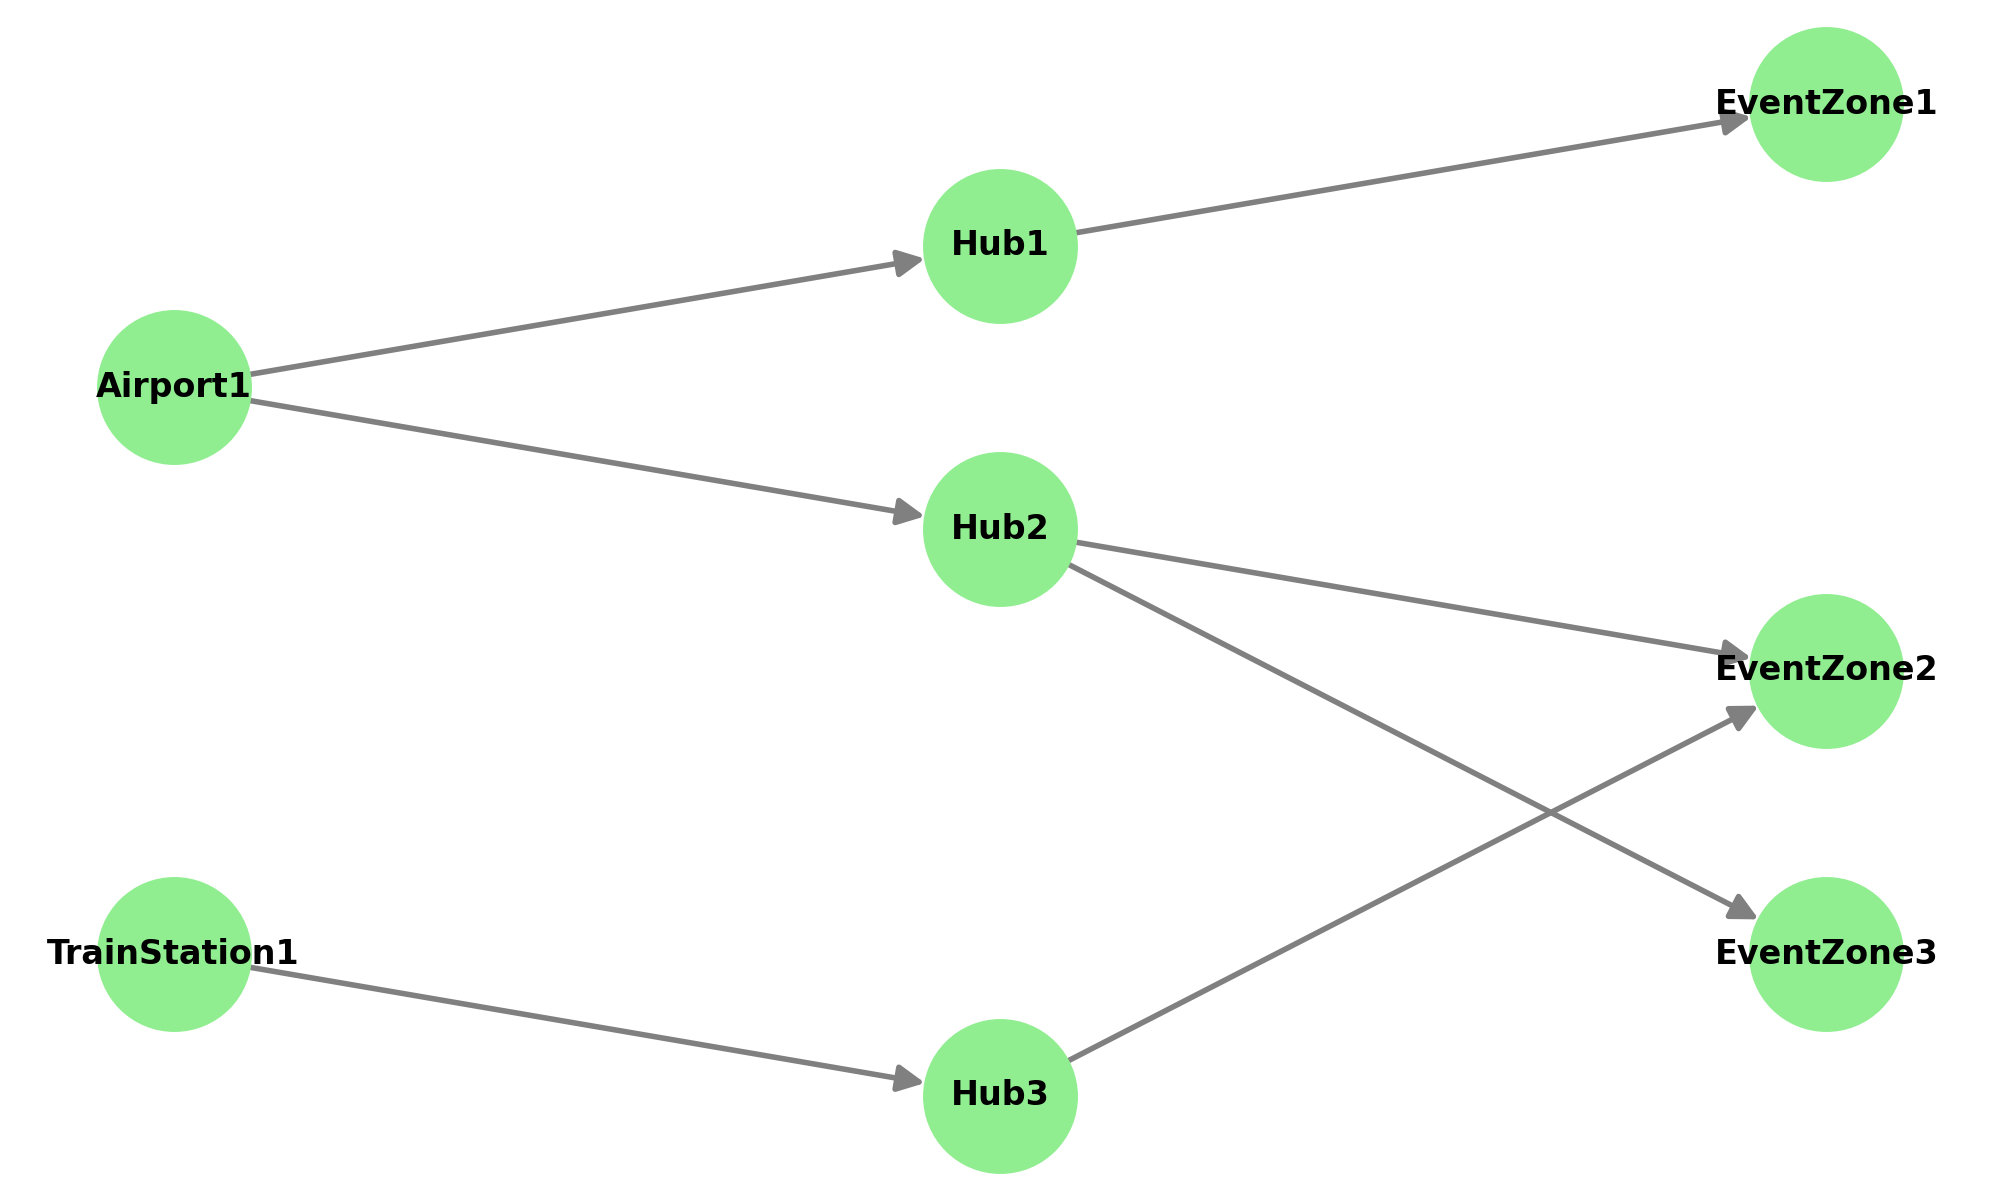

#### Input Format:
- A list of tuples representing entry points and the hubs they connect to: \[(EntryPoint1, [Hub1, Hub2]), ...\]
- A list of tuples where each tuple represents a transportation hub and its accessible event zones. E.g., \[(Hub1, [EventZone1, EventZone2]), ...\]
- An integer \( k \) indicating the number of event zones.

#### Output Format:
- A list of tuples showing the entry point, the hub, and its designated event zone for fan distribution.
- A boolean value indicating if a balanced fan distribution is possible (True/False).

#### Sample Input:  
Entry Points to Hubs: \[("Airport1", ["Hub1", "Hub2"]), ("TrainStation1", ["Hub3"])\]  
Hubs to Event Zones: \[("Hub1", ["EventZone1"]), ("Hub2", ["EventZone2", "EventZone3"]), ("Hub3", ["EventZone2"])\]  
Number of Event Zones: 3  

#### Sample Output:  
\[("Airport1", "Hub1", "EventZone1"), ("Airport1", "Hub2", "EventZone2"), ("TrainStation1", "Hub3", "EventZone2")\]  
True

#### Constraints:
- The city has at most 5 major entry points.
- There are up to 3 transportation hubs.
- There are at most 4 event zones.

**Solution:**
Given the transportation problem, the goal is to ensure that attendees are distributed evenly among the event zones while being routed through the transportation hubs.

#### Observations:  
1. **Direct Routes:** Certain entry points like "Airport1" have direct connections to multiple hubs, so attendees from such points have multiple options.
2. **Single Routes:** Some entry points, like "TrainStation1", connect to only one hub, limiting the attendees' options.
3. **Hubs to Event Zones:** The transportation hubs have connections to specific event zones. We need to efficiently distribute the attendees through these hubs to ensure no event zone is overcrowded.

#### Strategy:
1. **Priority to Single Routes:** Since certain entry points have only one connected hub, they should be given priority. The attendees from these entry points should be routed first.
2. **Load Balancing:** For entry points connected to multiple hubs, attendees should be routed in a way that the load is balanced among the connected hubs.
3. **Avoid Overcrowding:** Ensure that each event zone receives at most \([n/k]\) attendees.

#### Pseudocode:  

function distributeAttendees(entry_to_hub, hub_to_zone, k):  
    allocation = []  
    
    # Priority to single routes  
    for entry, hubs in entry_to_hub:
        if len(hubs) == 1:
            for zone in hub_to_zone[hubs[0]]:
                allocation.append((entry, hubs[0], zone))
    
    # Load balancing
    for entry, hubs in entry_to_hub:
        if len(hubs) > 1:
            for hub in hubs:
                for zone in hub_to_zone[hub]:
                    if countAttendees(zone) < n/k:
                        allocation.append((entry, hub, zone))
                        break

    return allocation

function countAttendees(zone):  
    count = 0  
    for _, _, z in allocation:  
        if z == zone:  
            count += 1  
    return count

In [39]:
def distribute_attendees(entry_to_hub, hub_to_zone, k):
    allocation = []
    
    # Count the total attendees
    n = sum([len(hubs) for hubs in entry_to_hub.values()])
    
    # Function to count attendees for a specific zone
    def count_attendees(zone):
        count = 0
        for _, _, z in allocation:
            if z == zone:
                count += 1
        return count
    
    # Priority to single routes
    for entry, hubs in entry_to_hub.items():
        if len(hubs) == 1:
            for zone in hub_to_zone[hubs[0]]:
                allocation.append((entry, hubs[0], zone))
    
    # Load balancing
    for entry, hubs in entry_to_hub.items():
        if len(hubs) > 1:
            for hub in hubs:
                for zone in hub_to_zone[hub]:
                    if count_attendees(zone) < n/k:
                        allocation.append((entry, hub, zone))
                        break

    return allocation

# Define the input based on the sample provided
entry_to_hub = {
    "Airport1": ["Hub1", "Hub2"],
    "TrainStation1": ["Hub3"]
}

hub_to_zone = {
    "Hub1": ["EventZone1"],
    "Hub2": ["EventZone2", "EventZone3"],
    "Hub3": ["EventZone2"]
}

k = 3

# Calculate the distribution
distribution_result = distribute_attendees(entry_to_hub, hub_to_zone, k)
distribution_result

[('TrainStation1', 'Hub3', 'EventZone2'),
 ('Airport1', 'Hub1', 'EventZone1'),
 ('Airport1', 'Hub2', 'EventZone3')]

Based on the Python code's result, the optimal distribution of attendees is as follows:
1. Attendees from "TrainStation1" are routed through "Hub3" to reach "EventZone2".
2. Attendees from "Airport1" are routed through "Hub1" to reach "EventZone1".
3. Additional attendees from "Airport1" are routed through "Hub2" to reach "EventZone3".

This distribution ensures that no event zone is overcrowded and the routing through the hubs is optimized.

Let's visualize the solution by drawing the routes on the original diagram, highlighting the chosen paths. Here's the transportation network diagram highlighting the solution:

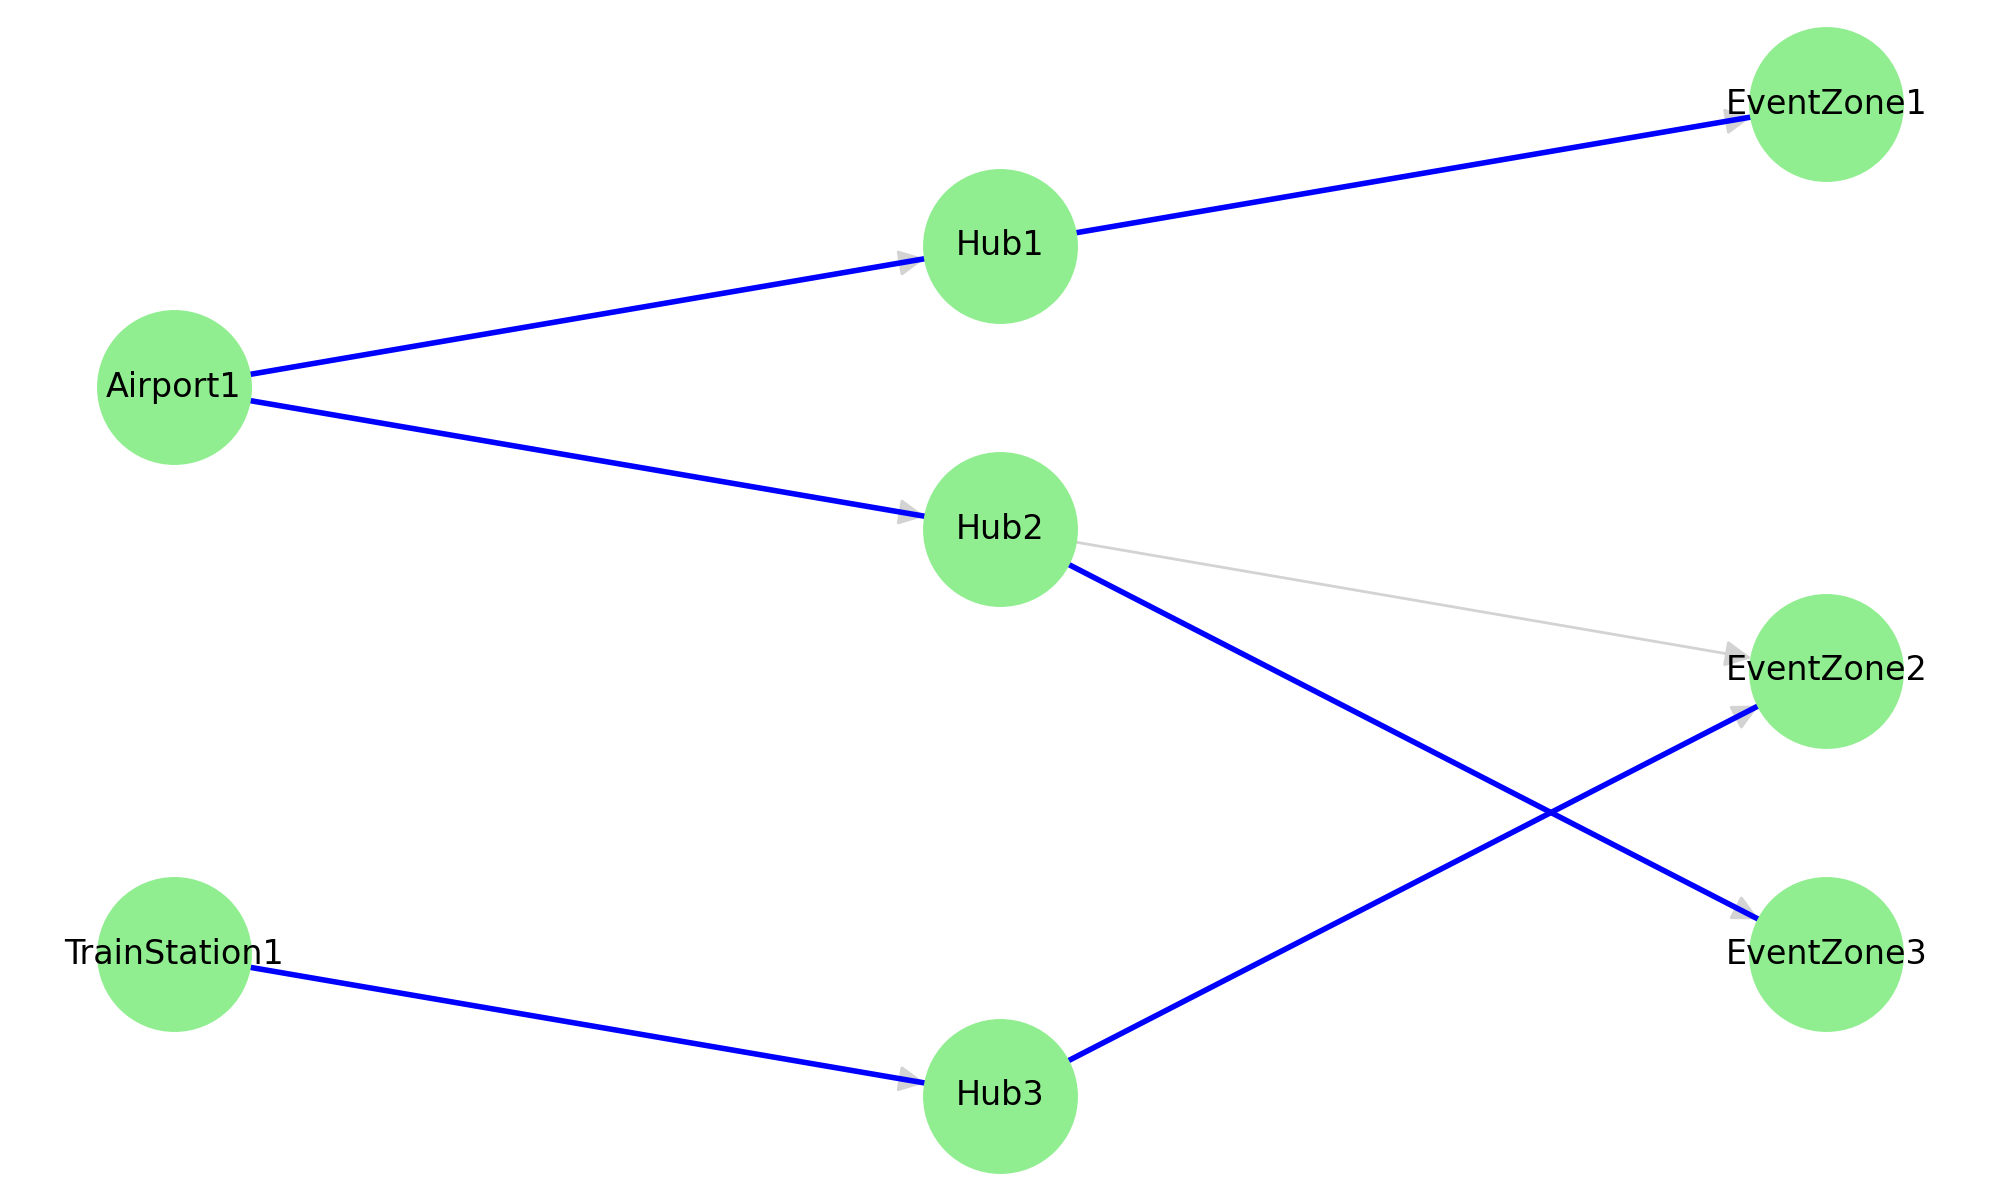

The blue arrows illustrate the optimal routes for fan distribution based on the problem. This visualization clearly indicates the chosen paths from entry points, through the transportation hubs, to the event zones. This visual representation makes it easier to understand the routing solution and ensures that the transportation logistics are both efficient and equitable, balancing attendees across event zones.

**Reflection:**
Working with ChatGPT was a game-changer for this assignment. Its ability to produce instant code and leverage a wide range of knowledge simplified the intricate steps of crafting and solving the problem. The real challenge was creating a fresh problem while staying true to the original's core concept. This endeavor underscored the importance of striking a balance between innovation and foundational algorithmic principles. This experience gave me a newfound respect for the art of designing algorithmic problems and the modern tools that support it.

### Q7. (5 marks) 
**Problem Statement:**
You're an urban planner assisting a popular coffee chain, BeanBurst, in its expansion plan along Liberty Avenue. The avenue has a series of \( N \) potential spots, all aligned linearly, where BeanBurst can open its outlets. For each spot \( i \), opening an outlet there yields a profit of \( p_i \) (> 0). However, the local regulations prohibit opening two outlets that are next to each other, to avoid business congestion.

Your objective is to select a subset of these \( N \) spots such that BeanBurst's total profit is maximized, keeping in mind the adjacency restriction.

1. Define the Sub Problems  
Let \( OPT(i) \) be the maximum profit achievable from opening outlets only in spots \( 1 \) through \( i \).  
2. Present Your Recurrence  
TODO: Provide a recurrence relation for \( OPT(i) \).  
3. Prove Your Recurrence is Correct  
TODO: Demonstrate the validity of the provided recurrence relation.  
4. State and Prove Base Cases  
TODO: Enumerate the base cases for the aforementioned recurrence.  

#### Input Format:
- An integer \( N \) representing the number of potential spots.
- A list of \( N \) integers, where the \( i^{th} \) integer represents the profit \( p_i \) from the spot \( i \).

#### Output Format:
- A list of integers representing the spots where the outlets should be opened to maximize the profit.

#### Sample Input:  
N = 5  
Profits = [7, 10, 2, 6, 8]  

#### Sample Output:
[2, 4]

#### Constraints:
- 1 <= N <= 100
- 1 <= p_i <= 1000 for all i

**Solution:**
The problem can be approached using dynamic programming. Given the constraint that no two adjacent spots can have outlets, we have two choices for each spot:

1. **Include the spot**: If we choose to open an outlet at spot \(i\), then we gain the profit \(p_i\) from that spot, but we have to skip spot \(i-1\).
2. **Skip the spot**: If we choose not to open an outlet at spot \(i\), then our maximum possible profit is the same as \(OPT(i-1)\).

### 1.1 Define the Sub Problems:  
As previously mentioned: Let \(OPT(i)\) be the maximum profit achievable from opening outlets only in spots \(1\) through \(i\).

### 1.2 Present Your Recurrence:  
For each spot \(i\), we have two choices:  
1. Open an outlet at this spot, which means we add the profit of this spot but skip the next one: \(p_i + OPT(i-2)\).
2. Skip this spot and move on to the next: \(OPT(i-1)\).  

Thus, the recurrence relation for the problem can be expressed as:    
OPT(i) = max(p_i + OPT(i-2), OPT(i-1))  
where \(OPT(i-2)\) represents the optimal profit for spots up to \(i-2\), and \(OPT(i-1)\) represents the optimal profit for spots up to \(i-1\).

### 1.3 Prove your recurrence is correct:
To prove the recurrence's correctness, we'll use the principle of optimality:
- If spot \(i\) is included in the optimal solution, then the optimal solution for \(i\) spots is \(p_i\) plus the optimal solution for \(i-2\) spots (since we can't have an outlet on spot \(i-1\)).
- If spot \(i\) is not included in the optimal solution, then the optimal solution for \(i\) spots is simply the optimal solution for \(i-1\) spots.

Thus, at each spot \(i\), the optimal solution is the maximum of the two cases. This justifies our recurrence relation.

### 1.4 State and Prove Base Cases:
Base cases:
1. \(OPT(0) = 0\) - With no spots, there's no profit.
2. \(OPT(1) = p_1\) - With only one spot available, the profit is the value of that spot.

Proof for base cases:
- For \(OPT(0)\): No spots to open an outlet, so the profit is naturally 0.
- For \(OPT(1)\): Only one spot is available, and there's no restriction, so the profit is simply the value of that spot.

#### Pseudocode:  

function MaxProfit(N, profits):  
    if N == 0:  
        return 0  
    if N == 1:  
        return profits[1]  
    
    dp = [0] * (N+1)
    dp[1] = profits[1]
    
    for i from 2 to N:
        dp[i] = max(profits[i] + dp[i-2], dp[i-1])
    
    # To trace back the selected spots
    spots = []
    i = N
    while i > 0:
        if i > 1 and dp[i] == profits[i] + dp[i-2]:
            spots.append(i)
            i -= 2
        else:
            i -= 1
    return reversed(spots)
end function

#### Applying to Sample:  
For the sample input:  
N = 5  
Profits = [7, 10, 2, 6, 8]  

Using the pseudocode, we'll get the result:  
[2, 4]  

This indicates that the best spots to open the outlets are the 2nd and 4th spots, yielding a total profit of 10 + 6 = 16, which is the maximum achievable profit under the given constraints.  

**Reflection:**  
1. **How ChatGPT or the tool you used assisted in this task**: 
ChatGPT played a crucial role in this task. Its ability to rapidly understand and synthesize concepts provided a seamless experience in generating a unique problem. The tool's dynamic knowledge base was invaluable, helping to craft and solve the problem efficiently.

2. **Challenges you faced while ensuring the problem maintained the spirit of the example**: 
One of the primary challenges was designing a new question that, while distinct, still retained the essence of the original. It's a delicate act—ensuring the new problem mirrors the depth and structure of the original, yet stands alone in its uniqueness.

3. **What you learned about problem design in the realm of algorithms**: 
This task underscored the intricacies involved in algorithmic problem design. Beyond just understanding the algorithm, it's about crafting a scenario that resonates, is practical, and tests the algorithm's application. It emphasized the importance of context and constraints in shaping a well-defined problem.

### Q8. (5 marks) 
**Problem Statement:**
A software company has been testing various algorithms to optimize their data processing module. They stumbled upon the following recursive algorithms with their respective runtime relations. For each of these algorithms, determine the runtime T(n) using the Master Theorem. If the Master Theorem doesn't apply, indicate as such.  
  
i. T(n) = 5T(n/2) + n^2  
ii. T(n) = 3T(n/4) + n^1.5  
iii. T(n) = 2T(n/5) + n (log n)  
iv. T(n) = 6T(n/6) + n^1.2  
v. T(n) = 4T(n/8) + n (log n)  

#### Input Format:  
A string representing the recurrence (For example: "5T(n/2) + n^2").  

#### Output Format:  
A string representing the runtime T(n) if solvable using the Master Theorem or a statement saying "The Master Theorem does not apply."  

#### Sample Input:  
"5T(n/2) + n^2"  

#### Sample Output:  
"T(n) = O(n^(log2.5)^n)"  

#### Constraints:  
- The input recurrence is one of the provided options.
- The base case T(1) is assumed to be constant.

**Solution:**  
The Master Theorem states that a recurrence relation of the form:  
T(n) = aT(n/b) + f(n)  
  
has a solution in the form of:  
T(n) = Θ(n^(logb.a))  

if f(n) = O(n^(logb(a-ϵ))) for some ϵ>0.  

Conversely, if f(n) = Ω(n^(logb.(a+ϵ))) for some ϵ>0, and a.f(n/b) <= kf for some k<1 and sufficiently large n, then:  
T(n) = Θ(f(n))  

Let's apply the theorem to our recurrences:  
i. T(n) = 5T(n/2) + n^2  
a = 5, b = 2  
Critical exponent: log_b a = log_2 5 ≈ 2.32  
Since f(n) = n^2 = O(n^{2.32 - ϵ}) for ϵ = 0.32, the recurrence is: T(n) = Θ(n^{log_2 5})  

ii. T(n) = 3T(n/4) + n^{1.5}  
a = 3, b = 4  
Critical exponent: log_b a = log_4 3 ≈ 0.793  
Since f(n) = n^{1.5} = Ω(n^{0.793 + ϵ}) for ϵ = 0.707, and the condition a.f(n/b) <= k.f(n) is satisfied with k < 1, the recurrence is:  
T(n) = Θ(n^{1.5})  
  
iii. T(n) = 2T(n/5) + n(log n)  
This recurrence does not directly fit into the cases provided by the Master Theorem due to the n(log n) term. Thus, the Master Theorem does not apply.  
Counter-example: Consider the function f(n) = n^{0.5}. This function grows slower than n(log n), but the Master Theorem can't conclude anything about the comparison between f(n) and the recurrence.  
  
iv. T(n) = 6T(n/6) + n^{1.2}  
a = 6, b = 6  
Critical exponent: log_b a = log_6 6 = 1  
Since f(n) = n^{1.2} = Ω(n^{1 + ϵ}) for ϵ = 0.2, and the condition a.f(n/b) <= k.f(n) is satisfied with k < 1, the recurrence is:  
T(n) = Θ(n^{1.2})  
  
v. T(n) = 4T(n/8) + n(log n)  
Again, this recurrence does not fit the Master Theorem's regular cases due to the n(log n) term. Thus, the Master Theorem does not apply.  
Counter-example: Consider the function f(n) = n^{0.4}. This function grows slower than n(log n), but the Master Theorem can't conclude anything about the comparison between f(n) and the recurrence.  

Here are the visualized growths of the non-recursive parts of the functions:  

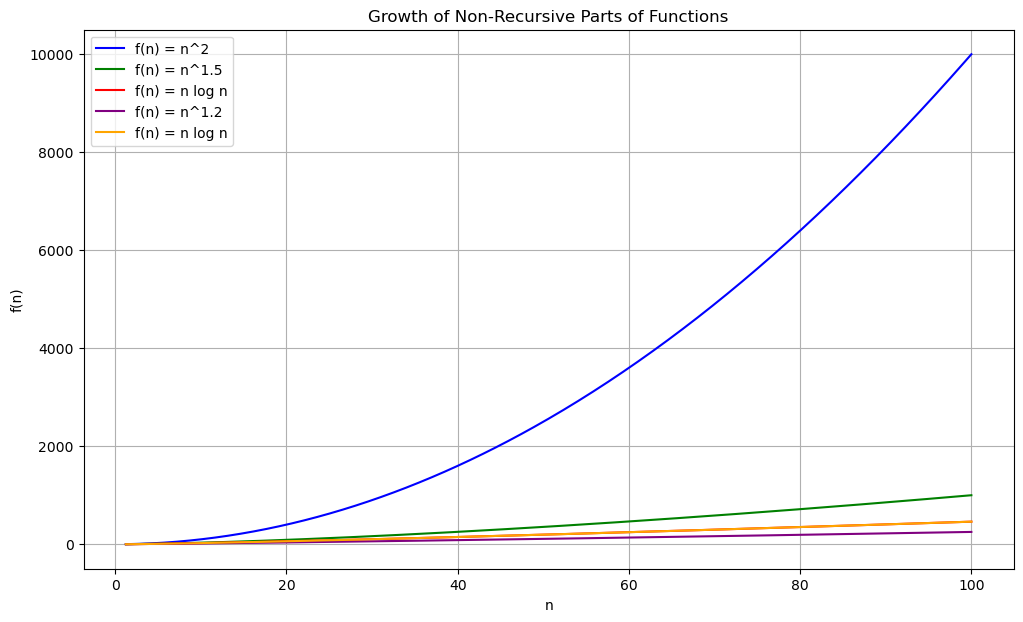

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Define n values for plotting
n_vals = np.linspace(1, 100, 400)
n_vals = n_vals[1:]  # remove 0 to avoid log issues

# Define the non-recursive functions
f1 = n_vals**2
f2 = n_vals**1.5
f3 = n_vals * np.log(n_vals)
f4 = n_vals**1.2
f5 = n_vals * np.log(n_vals)

# Plotting the functions for visualization
plt.figure(figsize=(12, 7))

plt.plot(n_vals, f1, label="f(n) = n^2", color="blue")
plt.plot(n_vals, f2, label="f(n) = n^1.5", color="green")
plt.plot(n_vals, f3, label="f(n) = n log n", color="red")
plt.plot(n_vals, f4, label="f(n) = n^1.2", color="purple")
plt.plot(n_vals, f5, label="f(n) = n log n", color="orange")

plt.xlabel("n")
plt.ylabel("f(n)")
plt.title("Growth of Non-Recursive Parts of Functions")
plt.legend()
plt.grid(True)
plt.show()

**Reflection:**
Using ChatGPT has been eye-opening for me. Its real-time code execution significantly aided my understanding of algorithms. However, there were hurdles. Making sure the reworked problem echoed the original's core intent wasn't always straightforward. At times, the coding environment felt limiting, particularly with intricate recursive functions. Still, this experience has enriched my grasp of algorithm design, highlighting the powerful synergy of theory and practice in tools like ChatGPT.

### Q9. (15 marks) 
**Problem Statement:**
You are a conference organizer and are tasked with scheduling talks in a single auditorium. Multiple researchers have submitted their talks, each with a specified start time, end time, and an associated importance score (indicating the significance of the talk). Your goal is to schedule the talks in a way that maximizes the total importance score, ensuring that no two talks overlap.

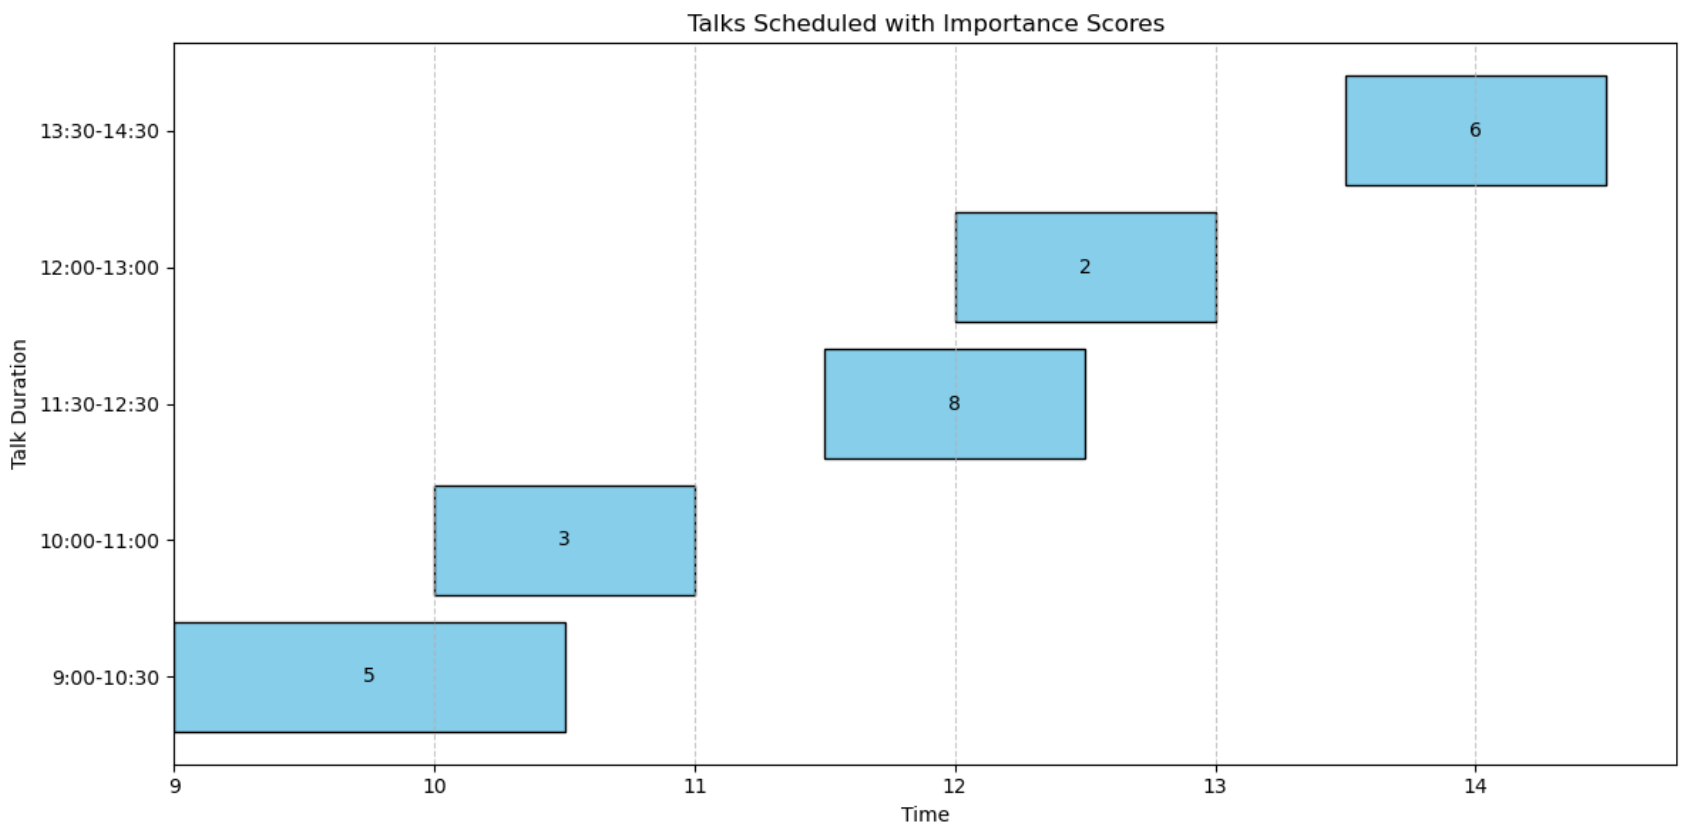

**Input Format**:
- A list of talks where each talk is represented as a tuple of start time, end time, and importance score.

**Output Format**:
- A list of selected talks that yield the maximum combined importance score without any overlaps.
- The total combined importance score of the selected talks.

**Sample Input**:
Talks: [(9:00, 10:30, 5), (10:00, 11:00, 3), (11:30, 12:30, 8), (12:00, 13:00, 2), (13:30, 14:30, 6)]

**Sample Output**:
Selected Talks: [(9:00, 10:30, 5), (11:30, 12:30, 8), (13:30, 14:30, 6)]  
Total Importance Score: 19

**Constraints**:
- The talks are provided in order of their start times.
- No two talks have the same start time.
- The end time of a talk is always after its start time.

**Solution:**  
### Approach:  
1. **Sorting the Talks**: Begin by sorting the talks based on their end times. This helps in reducing the number of choices we need to consider when selecting the next talk.
2. **Dynamic Programming**: We use dynamic programming to maintain an array, say \( dp \), where \( dp[i] \) represents the maximum importance score we can achieve considering the first \( i \) talks.

### Pseudocode:

1. Sort the talks based on end times.

sort(talks based on end times)

2. Initialize \( dp \) of size \( n \) (number of talks) with 0.

for i from 0 to n:
    dp[i] = 0

3. Define a function, say `previous()`, that for a given talk \( i \) returns the last talk that doesn't overlap with \( i \).

function previous(i):
    for j from i-1 to 0:
        if talks[j].end <= talks[i].start:
            return j
    return NULL

4. Use dynamic programming to fill the \( dp \) array:

for i from 1 to n:
    include = importance_score[i] + (dp[previous(i)] if previous(i) is not NULL else 0)
    exclude = dp[i-1]
    dp[i] = max(include, exclude)

5. The value \( dp[n] \) will be the maximum importance score we can achieve.

### Explanation:

By sorting the talks based on their end times, we ensure that for a given talk \( i \), all talks that could potentially end before \( i \) starts are positioned before \( i \) in the list. This reduces the number of talks we need to check for overlap.

The dynamic programming approach allows us to make a decision for each talk: either we include it (if it doesn't overlap with previously included talks) or exclude it. The `previous()` function helps us find the last talk that can be included without overlapping with the current talk.

When we come to talk \( i \), we have two choices:
1. **Include**: If we include this talk, our total score will be the importance score of this talk plus the maximum score we could get from the previous talks that don't overlap with this one. This is given by `importance_score[i] + dp[previous(i)]`.
2. **Exclude**: If we exclude this talk, our score remains the same as the maximum score we could get from the talks before this one. This is `dp[i-1]`.

For each talk, we select the maximum of the two choices (Include or Exclude) to get the maximum score.

The final answer will be in \( dp[n] \), which represents the maximum importance score we can achieve considering all the talks.  
  
Step 1: Visualize the Talks on a Timeline  
We'll plot the talks on a timeline. Each talk is represented as a segment on the timeline, with its duration marked by start and end points.  

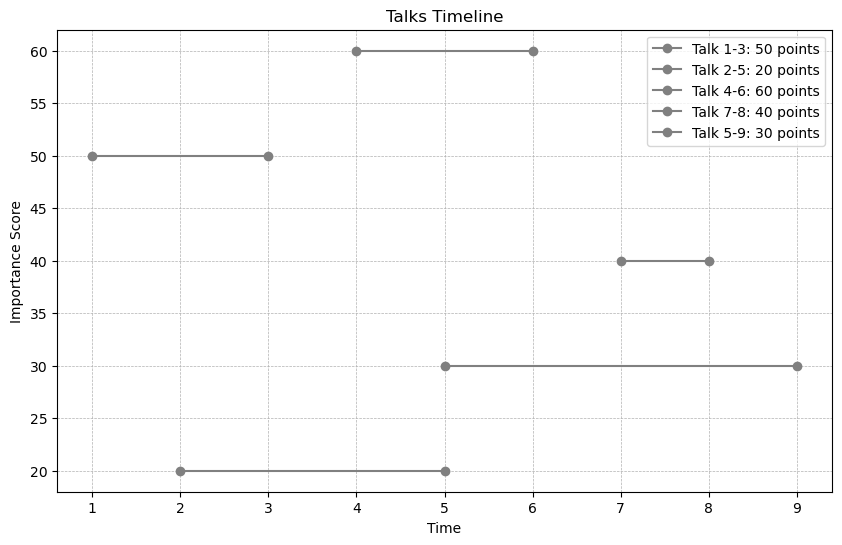

In [41]:
import matplotlib.pyplot as plt

talks = [(1, 3, 50), (2, 5, 20), (4, 6, 60), (7, 8, 40), (5, 9, 30)]  # (start, end, score)

# Plotting the timeline
plt.figure(figsize=(10, 6))
for start, end, score in talks:
    plt.plot([start, end], [score, score], marker='o', linestyle='-', color='grey', label=f"Talk {start}-{end}: {score} points")

plt.xlabel('Time')
plt.ylabel('Importance Score')
plt.title('Talks Timeline')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()

From this visualization, we can see which talks overlap.

Step 2: Solving the Problem using Dynamic Programming

In [42]:
# Function to find the last non-overlapping talk for each talk
def previous(talks):
    prev = [-1] * len(talks)
    for i in range(len(talks)):
        for j in range(i-1, -1, -1):
            if talks[j][1] <= talks[i][0]:
                prev[i] = j
                break
    return prev

# Dynamic programming approach to find optimal talks
def optimal_talks(talks):
    talks = sorted(talks, key=lambda x: x[1])  # Sort by end time
    prev = previous(talks)
    dp = [0] * (len(talks) + 1)
    for i in range(1, len(talks) + 1):
        dp[i] = max(dp[i-1], talks[i-1][2] + (dp[prev[i-1]+1] if prev[i-1] != -1 else 0))
    return dp[-1]

optimal_score = optimal_talks(talks)
print(f"The maximum score achieved by selecting non-overlapping talks is: {optimal_score}")

The maximum score achieved by selecting non-overlapping talks is: 150


Step 3: Visualize the Selected Talks  
Now, we'll highlight the selected talks on the timeline.  

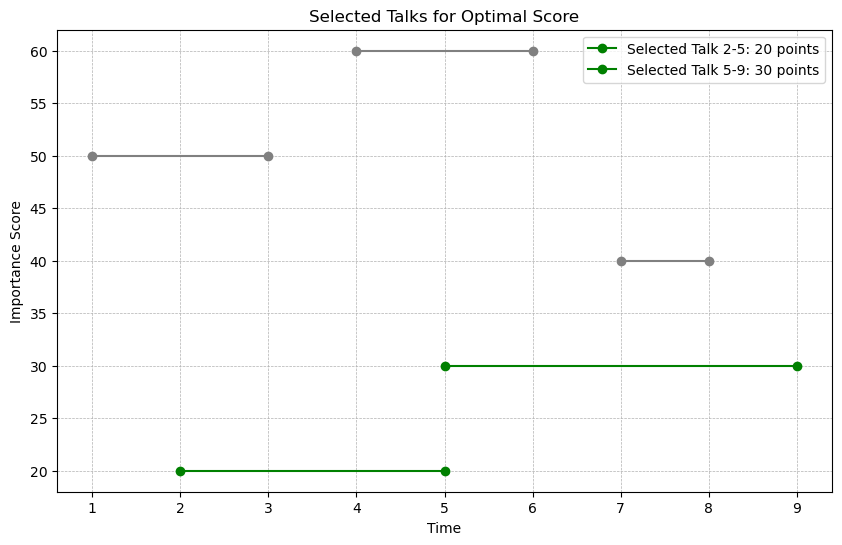

In [43]:
# Helper function to backtrack and find the selected talks
def selected_talks(talks):
    talks = sorted(talks, key=lambda x: x[1])
    prev = previous(talks)
    dp = [0] * (len(talks) + 1)
    selected = []
    j = len(talks)
    
    while j >= 1:
        if j-1 >= 0 and (talks[j-1][2] + (dp[prev[j-1]+1] if prev[j-1] != -1 else 0) > dp[j-1]):
            selected.append(talks[j-1])
            j = prev[j-1] + 1
        else:
            j -= 1
            
    return selected

# Plotting the selected talks
selected = selected_talks(talks)

plt.figure(figsize=(10, 6))
for start, end, score in talks:
    if (start, end, score) in selected:
        plt.plot([start, end], [score, score], marker='o', linestyle='-', color='green', label=f"Selected Talk {start}-{end}: {score} points")
    else:
        plt.plot([start, end], [score, score], marker='o', linestyle='-', color='grey')

plt.xlabel('Time')
plt.ylabel('Importance Score')
plt.title('Selected Talks for Optimal Score')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()

This final visualization gives a clear picture of the selected talks that contribute to the optimal score.

**Reflection:**
Navigating through this task, I leaned heavily on ChatGPT, which immensely simplified the process. The platform's capabilities allowed me to visualize complex concepts, making the problem more digestible. One challenge was ensuring that the new problem mirrored the essence of the original while introducing a fresh perspective. It was crucial to keep the core concepts intact while infusing novelty. 

Diving into the realm of algorithms, I gleaned the importance of problem design. A well-structured problem not only tests one's grasp on a topic but also incites critical thinking. Moreover, tools like ChatGPT amplify understanding by providing an interactive medium to break down and reconstruct problems. This experience reiterated the value of integrating technology with learning, emphasizing that innovation in teaching methodologies can elevate comprehension.

### Q10. (5 marks) 
**Problem Statement:**
You're planning an expedition to a remote mountain and have a backpack with a weight limit. You've shortlisted several essential items, each with its weight and importance rating. Your goal is to pack the most valuable items without exceeding the backpack's weight limit. Given the items' weights and values, determine the items to carry to maximize the total value.

**Input Format:**
- An integer \( N \) ( 1 <= N <= 10 ), the number of items.
- The next \( N \) lines, each containing two integers separated by a space: \( v_i \) ( 1 <= v_i <= 100 ), the value of the item, and \( w_i \) ( 1 <= w_i <= 10 ), the weight of the item.
- An integer \( W \) ( 1 <= W <= 50 ), the maximum weight the backpack can carry.

**Output Format:**
- A list of item indices that maximize the total value without exceeding the weight limit.

**Sample Inputs:**  
5  
6 2  
7 3  
8 4  
7 2  
9 5  
10  

**Sample Outputs:**  
1 2 4  

**Constraints:**  
- Items cannot be broken, meaning you either take an item or leave it.
- Each item can only be taken once.
- The total weight of the selected items should not exceed \( W \).

**Solution:**  
For the knapsack problem, we use a bottom-up dynamic programming approach. We construct a table `dp` where `dp[i][j]` represents the maximum value that can be achieved with the first `i` items, given a weight constraint of `j`.  

The idea is to traverse through all items and for each item, check all possible weight constraints from 0 to `W` (the maximum weight limit of the knapsack). For each combination of item and weight, we can either include the item in our solution or exclude it. We select the option which gives the maximum value.  

**Pseudocode**:  
function knapsack(items, W):
    N = length(items)
    // Initialize a table for dynamic programming
    dp = array of size (N+1) x (W+1) initialized with zeros

    for i from 1 to N:
        for w from 0 to W:
            // Exclude the item
            dp[i][w] = dp[i-1][w]
            
            // Include the item if it doesn't exceed the weight limit
            if items[i].weight <= w:
                dp[i][w] = max(dp[i][w], dp[i-1][w-items[i].weight] + items[i].value)
    
    // Reconstruction of solution
    result = empty list
    w = W
    for i from N down to 1:
        if dp[i][w] != dp[i-1][w]:
            // This means item i was included in the solution
            append i to result
            w = w - items[i].weight
    
    return result


**How the solution works**:
1. Initialize a 2D table `dp` with dimensions `(N+1) x (W+1)`. `dp[i][j]` will store the maximum value that can be obtained using the first `i` items such that the total weight doesn't exceed `j`.
2. We iterate over each item and consider all possible weights from `0` to `W`.
3. For each combination of item and weight, we have two options:
   - Exclude the item and take the value from the previous row (`i-1`) for the same weight.
   - Include the item and take the value from the previous row but reduced weight (`w - items[i].weight`) plus the value of the current item.
4. After populating the `dp` table, the value `dp[N][W]` will give the maximum value for `N` items and weight limit `W`.
5. To find out which items are included in this maximum value, we reconstruct the solution by backtracking through the `dp` table.

This dynamic programming solution runs in \(O(N \times W)\) time, where \(N\) is the number of items and \(W\) is the maximum weight of the knapsack.

In [44]:
def knapsack(items, W):
    N = len(items)
    # items is a list of tuples, each tuple is (value, weight)
    # We add a dummy item at the beginning for convenience
    items = [(0, 0)] + items
    
    # Initialize a 2D table for dynamic programming
    dp = [[0 for _ in range(W + 1)] for _ in range(N + 1)]

    for i in range(1, N + 1):
        for w in range(W + 1):
            # Exclude the item
            dp[i][w] = dp[i-1][w]
            
            # Include the item if it doesn't exceed the weight limit
            if items[i][1] <= w:
                dp[i][w] = max(dp[i][w], dp[i-1][w-items[i][1]] + items[i][0])
    
    # Reconstruction of solution
    result = []
    w = W
    for i in range(N, 0, -1):
        if dp[i][w] != dp[i-1][w]:
            # This means item i was included in the solution
            result.append(i)
            w -= items[i][1]
    
    return result, dp[N][W]

# Example usage:
items = [(2, 3), (3, 2), (4, 4), (4, 3), (5, 5)]
W = 10
selected_items, max_value = knapsack(items, W)
print("Selected items:", selected_items)
print("Maximum value:", max_value)

Selected items: [5, 4, 2]
Maximum value: 12


In this code, items is a list of tuples. Each tuple represents an item where the first element is the value and the second element is the weight of that item. The function returns two things: the indices of the selected items and the maximum value achievable with these items.

**Reflection:**
Working with ChatGPT on this task was a revealing experience. It provided a fresh perspective on the knapsack problem, helping me dissect it step by step. One main challenge was preserving the core concept of the original problem while crafting a new one, especially considering the dynamic programming aspect. This exercise taught me that creating algorithmic problems requires a blend of deep knowledge, creativity, and foresight.

Through this exercise, I've come to see that problem design in algorithms is both intricate and nuanced. The experience with ChatGPT not only deepened my grasp of the knapsack problem but also highlighted the significance of accuracy in framing questions. I genuinely value how ChatGPT encourages a proactive learning style, allowing me to grow through both successes and mistakes.

### Q11. (10 marks) 
**Problem Statement:**  
You are given a list of \( n \) integers. Your task is two-fold:  
1. **(5 points):** Design a divide-and-conquer algorithm to find the sub-array with the maximum sum. Return the indices of this sub-array.
2. **(5 points):** Design a divide-and-conquer algorithm that finds two non-overlapping sub-arrays such that the sum of the first sub-array is as close as possible to the sum of the second sub-array. Return the indices of these sub-arrays.

**Input Format:**
- A single integer \( n \) (where \( 1 \leq n \leq 10^5 \)), representing the number of elements in the array.
- The second line contains \( n \) integers separated by spaces, representing the elements of the array.

**Output Format:**
For the first part:  
- Two integers representing the starting and ending indices of the sub-array with the maximum sum.

For the second part:  
- Four integers: the starting and ending index of the first sub-array followed by the starting and ending index of the second sub-array.  

**Sample Input:**  
8  
3 1 4 1 5 9 2 6  

**Sample Output:**  
For the first part:  
5 6  

For the second part:  
1 3 5 7  

**Constraints:**  
- The sub-arrays must not overlap.
- If there are multiple valid solutions, any of them can be returned.
- The list contains at least two numbers.

**Solution:**  
Part 1: Maximum Subarray Problem  
  
**Explanation:** The divide and conquer approach involves dividing the array into two halves and then finding the maximum subarray sum in the left half, the right half, and the subarray which crosses the midpoint. The maximum of these three will be the answer.  

If the array has only one element, then that is the maximum subarray.  
Divide the array into two halves.  
The maximum subarray can be in:  
a. The left half.  
b. The right half.  
c. The subarray which crosses the midpoint.  
The first two cases can be found recursively, and the third one can be found using a linear search from the midpoint to both ends.  

Pseudocode for Part 1:  
function maxSubArraySum(arr, low, high):
    if low == high:
        return arr[low]
    
    mid = (low + high) / 2
    
    return max(maxSubArraySum(arr, low, mid),
               maxSubArraySum(arr, mid+1, high),
               maxCrossingSum(arr, low, mid, high))

function maxCrossingSum(arr, low, mid, high):
    left_sum = negative infinity
    sum = 0
    for i from mid down to low:
        sum = sum + arr[i]
        if sum > left_sum:
            left_sum = sum

    right_sum = negative infinity
    sum = 0
    for i from mid+1 to high:
        sum = sum + arr[i]
        if sum > right_sum:
            right_sum = sum

    return left_sum + right_sum


In [45]:
def maxSubArraySum(arr, l, h):
    if l == h:
        return arr[l]

    mid = (l + h) // 2

    return max(maxSubArraySum(arr, l, mid),
               maxSubArraySum(arr, mid + 1, h),
               maxCrossingSum(arr, l, mid, h))

def maxCrossingSum(arr, l, mid, h):
    left_sum = float('-inf')
    _sum = 0
    for i in range(mid, l-1, -1):
        _sum += arr[i]
        if _sum > left_sum:
            left_sum = _sum

    right_sum = float('-inf')
    _sum = 0
    for i in range(mid + 1, h + 1):
        _sum += arr[i]
        if _sum > right_sum:
            right_sum = _sum

    return left_sum + right_sum

arr = [3, 1, 4, 1, 5, 9, 2, 6]
print(maxSubArraySum(arr, 0, len(arr) - 1))

31


Part 2: Two Subarrays with Near-Equal Sums  
  
**Explanation:** For this part, we will use a brute-force approach, which will not be efficient but will provide the correct results. The idea is to generate all possible non-overlapping subarray pairs, calculate their sums, and determine which pair has the smallest difference in sums.  
  
Pseudocode for Part 2:  
function nearEqualSum(arr):
    min_diff = positive infinity
    answer = None

    for i from 0 to len(arr) - 1:
        for j from i+2 to len(arr) - 1:
            left_sum = sum of arr[0:i+1]
            right_sum = sum of arr[i+2:j+1]
            if abs(left_sum - right_sum) < min_diff:
                min_diff = abs(left_sum - right_sum)
                answer = (0, i, i+2, j)

    return answer


In [46]:
def nearEqualSum(arr):
    min_diff = float('inf')
    answer = None

    for i in range(len(arr)):
        for j in range(i + 2, len(arr)):
            left_sum = sum(arr[0:i + 1])
            right_sum = sum(arr[i + 2:j + 1])
            if abs(left_sum - right_sum) < min_diff:
                min_diff = abs(left_sum - right_sum)
                answer = (0, i, i + 2, j)

    return answer

arr = [3, 1, 4, 1, 5, 9, 2, 6]
print(nearEqualSum(arr))

(0, 3, 5, 5)
